In [1083]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns',123)
pd.set_option('display.max_rows',300)

In [1084]:
# Reading the dataset
application_df=pd.read_csv('application_data.csv')

In [1085]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [1086]:
application_df.shape

(307511, 122)

In [1087]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [1088]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### REMOVING UNWANTED COLUMNS

In [1089]:
application_df=application_df.filter(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',                                         
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
"DAYS_LAST_PHONE_CHANGE"])

In [1090]:
application_df.shape

(307511, 41)

In [1091]:
application_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MO

In [1092]:
# Percentage of Missing values in the application_df
round(application_df.isnull().sum()/len(application_df)*100,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MO

In [1093]:
application_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [1094]:
application_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

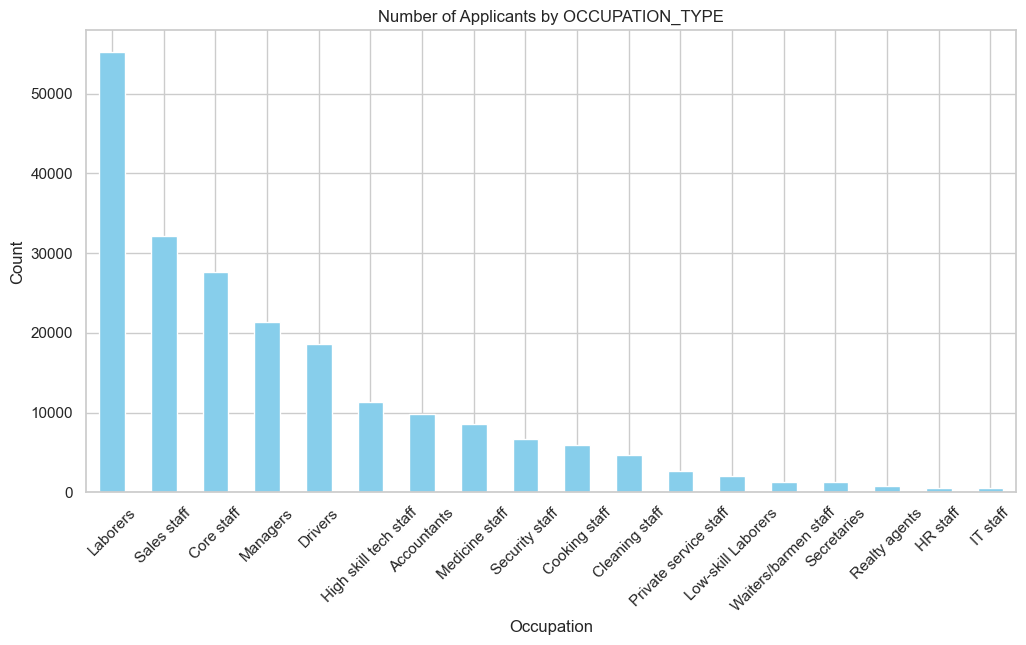

In [1095]:
import matplotlib.pyplot as plt

# Plot the distribution of OCCUPATION_TYPE
plt.figure(figsize=(12, 6))
application_df['OCCUPATION_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Applicants by OCCUPATION_TYPE')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
    

In [1096]:
# Group by 'NAME_INCOME_TYPE' and get the mode of 'OCCUPATION_TYPE' for each group
occupation_by_income=application_df.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].agg(lambda x:x.mode()[0] if not x.mode().empty else 'Unknown')

# Print to verify the mode for each income type
print(occupation_by_income)


NAME_INCOME_TYPE
Businessman                   Managers
Commercial associate          Laborers
Maternity leave             Core staff
Pensioner               Cleaning staff
State servant               Core staff
Student                       Laborers
Unemployed                     Unknown
Working                       Laborers
Name: OCCUPATION_TYPE, dtype: object


In [1097]:
# Replace missing OCCUPATION_TYPE values within each NAME_INCOME_TYPE group with the mode
for income_type in occupation_by_income.index:
    mode_occupation = occupation_by_income[income_type]
    
    application_df.loc[
        (application_df['NAME_INCOME_TYPE'] == income_type) & (application_df['OCCUPATION_TYPE'].isna()), 
        'OCCUPATION_TYPE'
    ] = mode_occupation

# Example - If income_type is 'Working' and mode_occupation is 'Laborers', every missing OCCUPATION_TYPE within the 'Working' group will be filled in with 'Laborers'

# Verify the changes
print(application_df[['NAME_INCOME_TYPE', 'OCCUPATION_TYPE']].head(20))


        NAME_INCOME_TYPE OCCUPATION_TYPE
0                Working        Laborers
1          State servant      Core staff
2                Working        Laborers
3                Working        Laborers
4                Working      Core staff
5          State servant        Laborers
6   Commercial associate     Accountants
7          State servant        Managers
8              Pensioner  Cleaning staff
9                Working        Laborers
10               Working      Core staff
11             Pensioner  Cleaning staff
12               Working        Laborers
13               Working         Drivers
14               Working        Laborers
15               Working        Laborers
16               Working         Drivers
17               Working        Laborers
18               Working        Laborers
19         State servant      Core staff


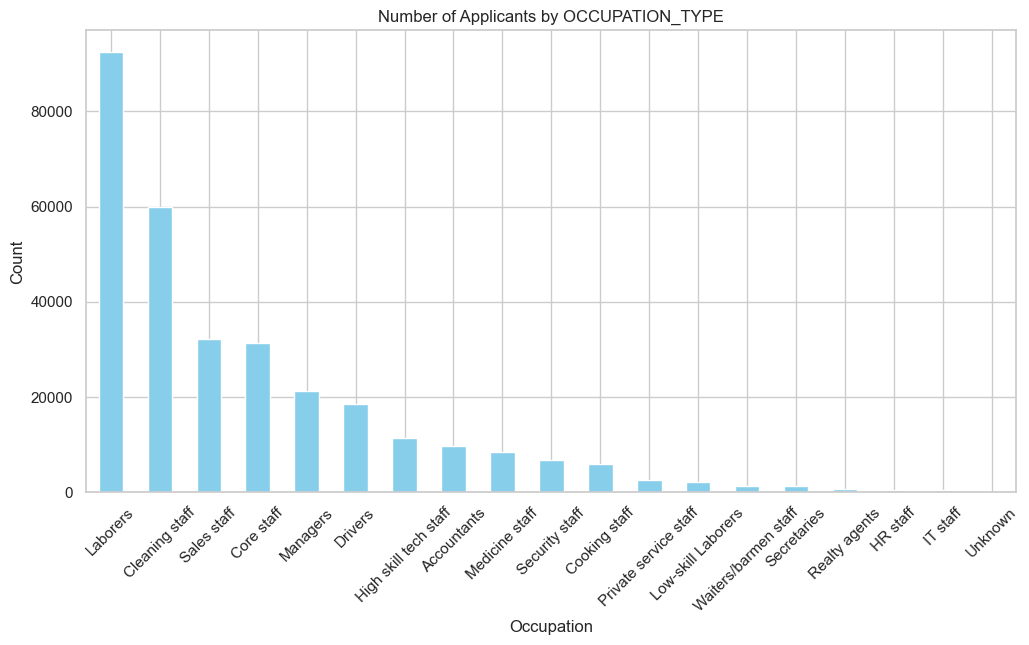

In [1098]:
# Plot the distribution of OCCUPATION_TYPE
plt.figure(figsize=(12, 6))
application_df['OCCUPATION_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Applicants by OCCUPATION_TYPE')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [1099]:
round(application_df.isnull().sum()/len(application_df)*100,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
OCCUPATION_TYPE                 0.000
CNT_FAM_MEMBERS                 0.001
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MO

In [1100]:
# Dropping columns where null values are greater than 20% 

application_df=application_df.drop(['EXT_SOURCE_1'],axis=1)

In [1101]:
application_df.shape

(307511, 40)

In [1102]:
round(application_df.isnull().sum()/len(application_df)*100,4)

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                 0.0000
CNT_FAM_MEMBERS                 0.0007
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE          

In [1103]:
# Filling null values with the median of that column
application_df['AMT_GOODS_PRICE'].fillna(application_df['AMT_GOODS_PRICE'].median(),inplace=True)

In [1104]:
application_df['EXT_SOURCE_2'].fillna(application_df['EXT_SOURCE_2'].median(),inplace=True)

In [1105]:
application_df['EXT_SOURCE_3'].fillna(application_df['EXT_SOURCE_3'].median(),inplace=True)

In [1106]:
application_df['AMT_ANNUITY'].fillna(application_df['AMT_ANNUITY'].median(),inplace=True)

In [1107]:
application_df['CNT_FAM_MEMBERS'].fillna(application_df['CNT_FAM_MEMBERS'].median(),inplace=True)

In [1108]:
application_df['DAYS_LAST_PHONE_CHANGE'].fillna(application_df['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

In [1109]:
round(application_df.isnull().sum()/len(application_df)*100,4)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0000
AMT_GOODS_PRICE                0.0000
NAME_TYPE_SUITE                0.4201
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
OCCUPATION_TYPE                0.0000
CNT_FAM_MEMBERS                0.0000
FLAG_MOBIL                     0.0000
FLAG_EMP_PHONE                 0.0000
FLAG_WORK_PHONE                0.0000
FLAG_CONT_MO

In [1110]:
# Here I get frequency of each unique category so that I get to know the highest frequency where I can fill null values with mode because NAME_TYPE_SUITE is the object data type column
application_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [1111]:
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [1112]:
# Finally all NULL values has removed
round(application_df.isnull().sum()/len(application_df)*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT

In [1113]:
application_df.shape
print('After data cleaning there are 307511 rows and 40 columns')

After data cleaning there are 307511 rows and 40 columns


In [1114]:
# Seggregating the numeric columns to see the outliers

numerics=['int16','int32','int64','float16','float32','float64']
outlier_df=application_df.select_dtypes(include=numerics)

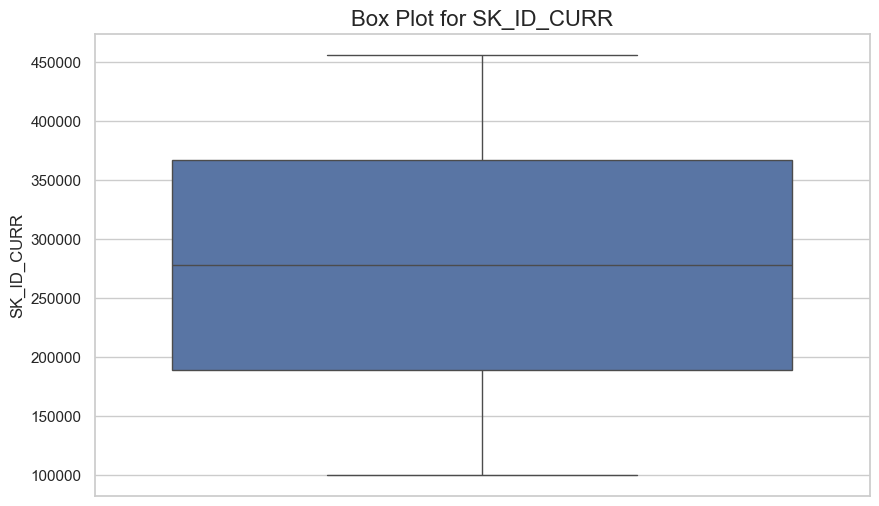

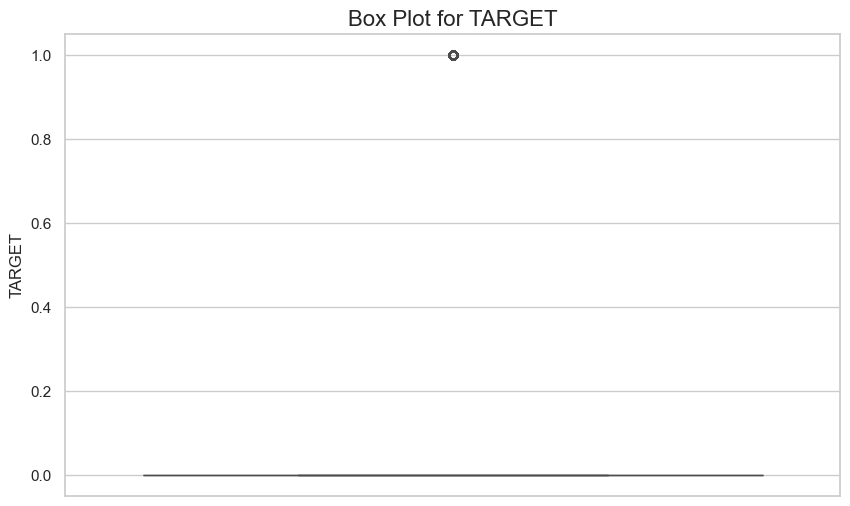

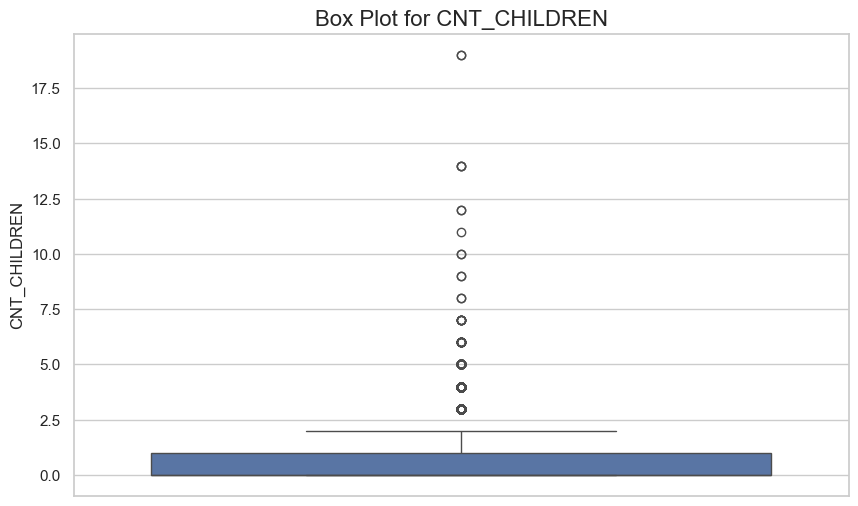

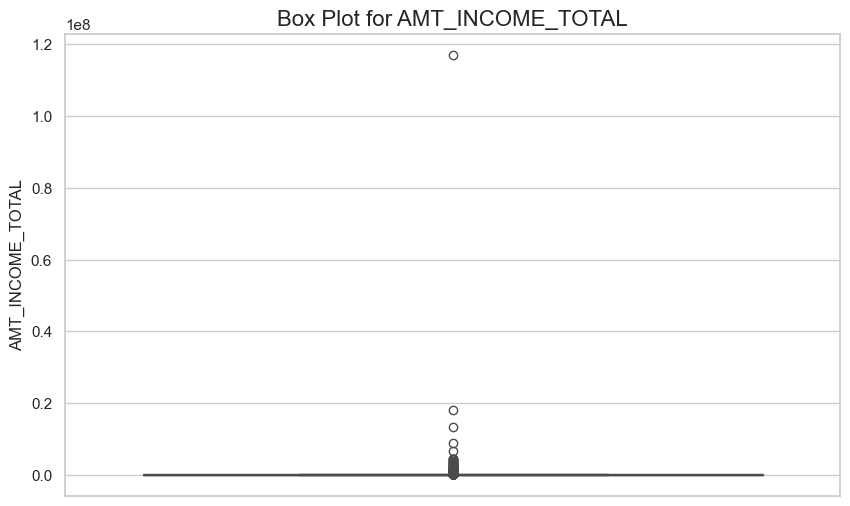

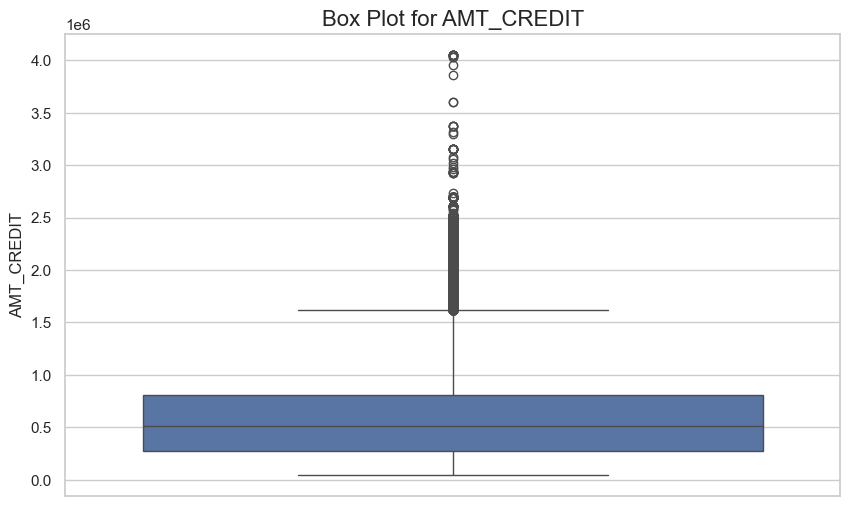

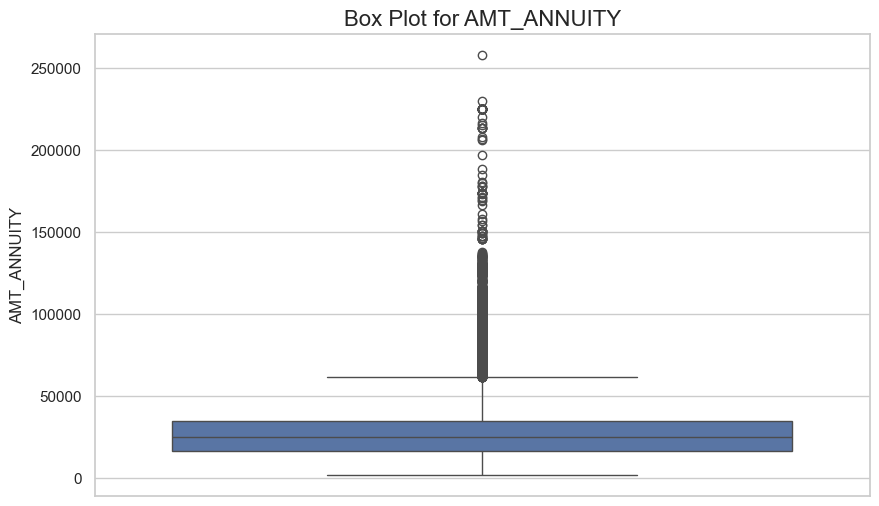

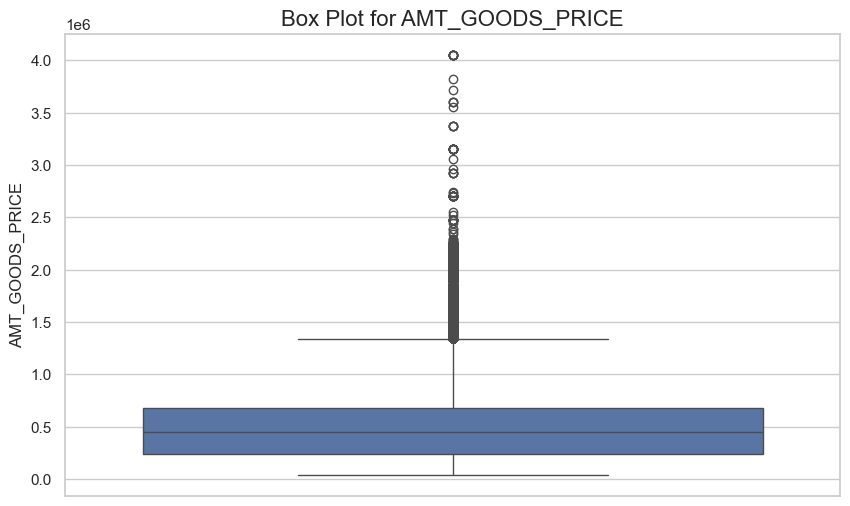

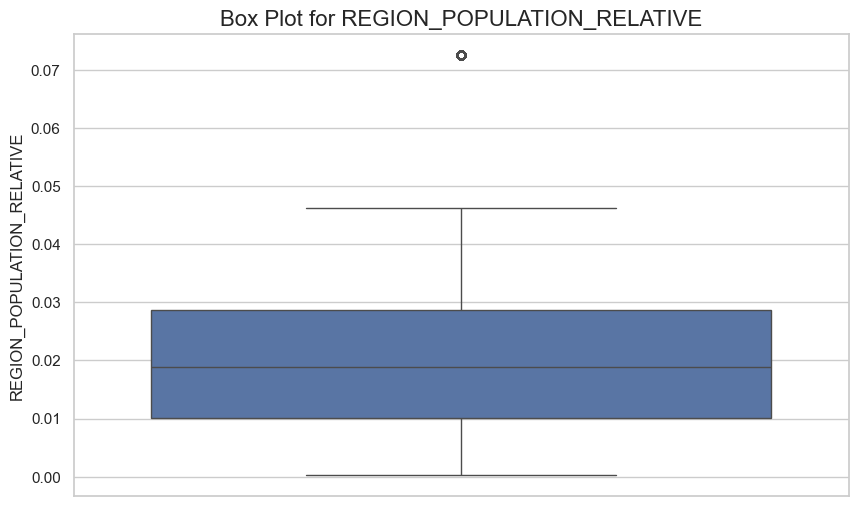

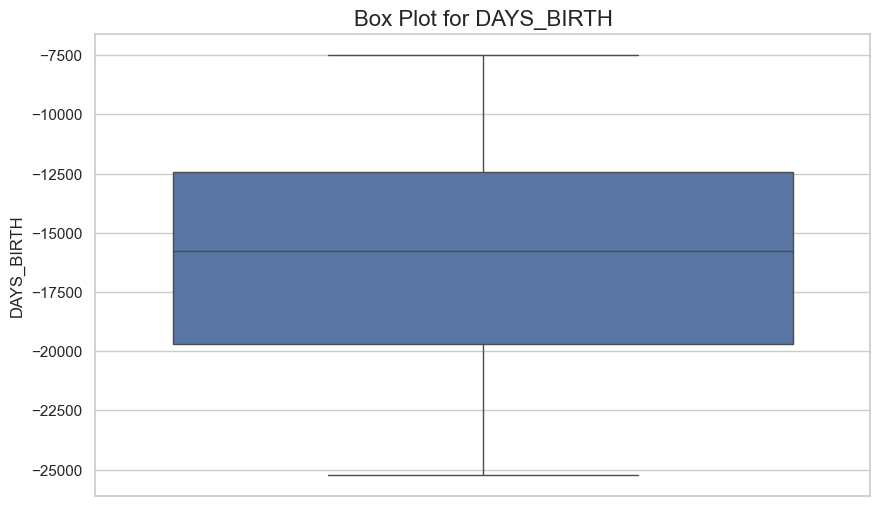

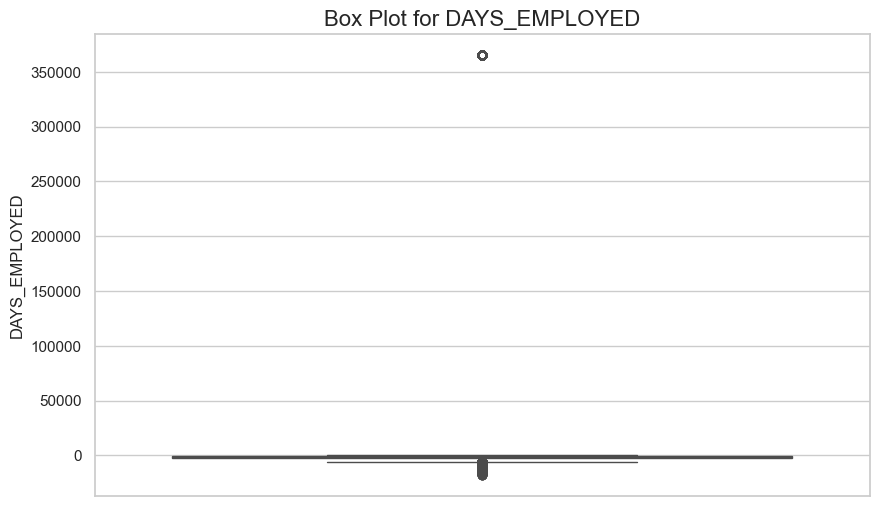

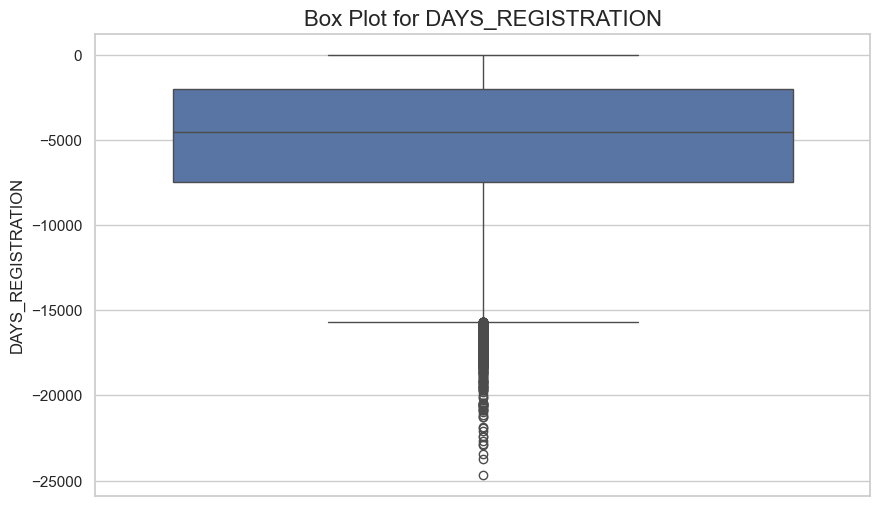

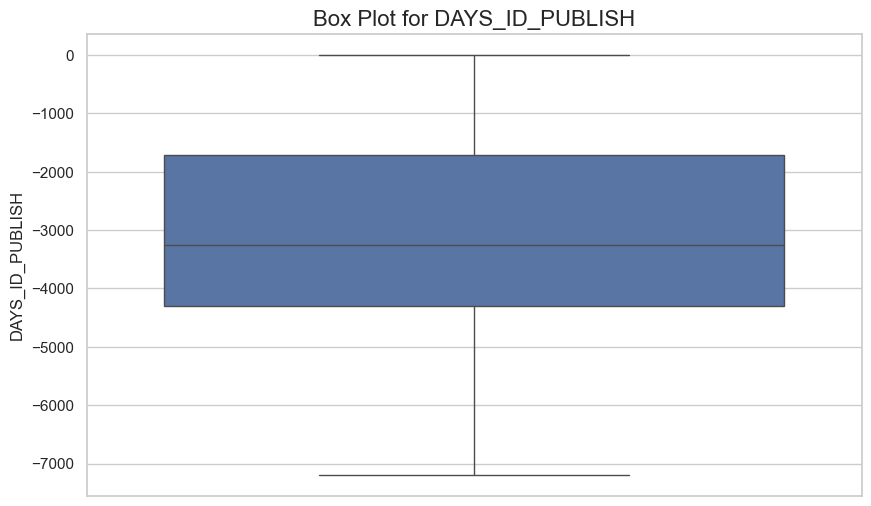

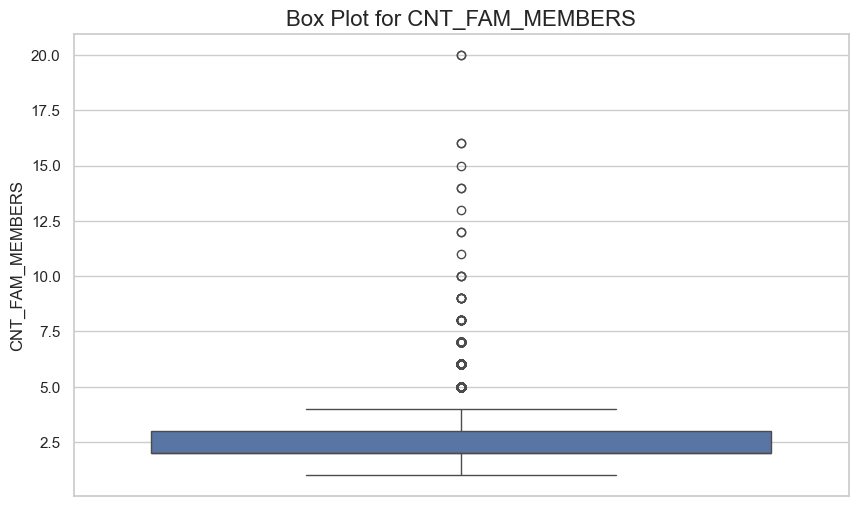

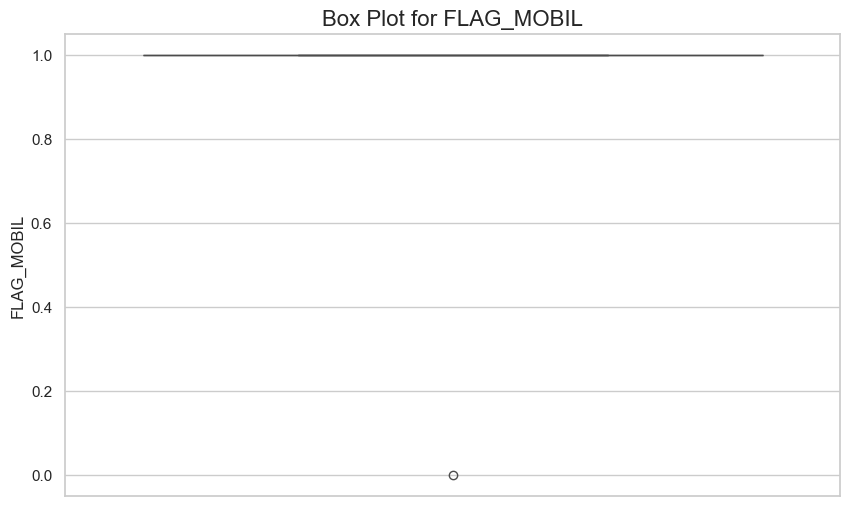

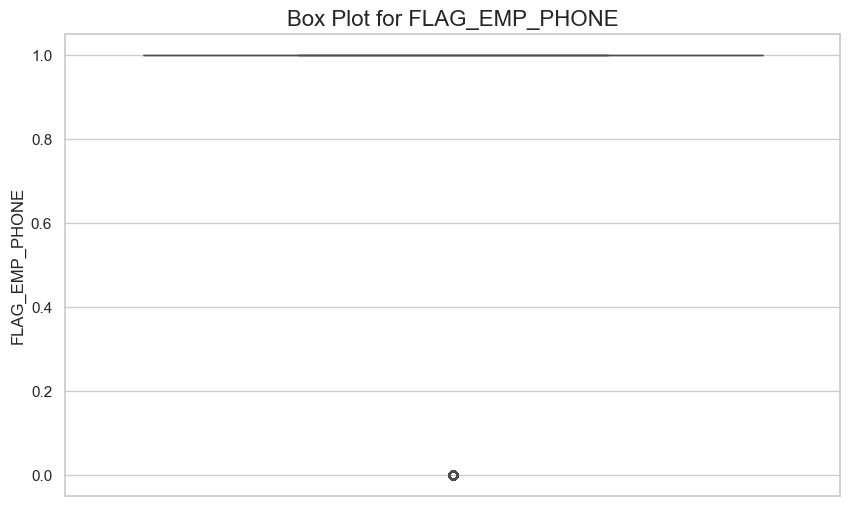

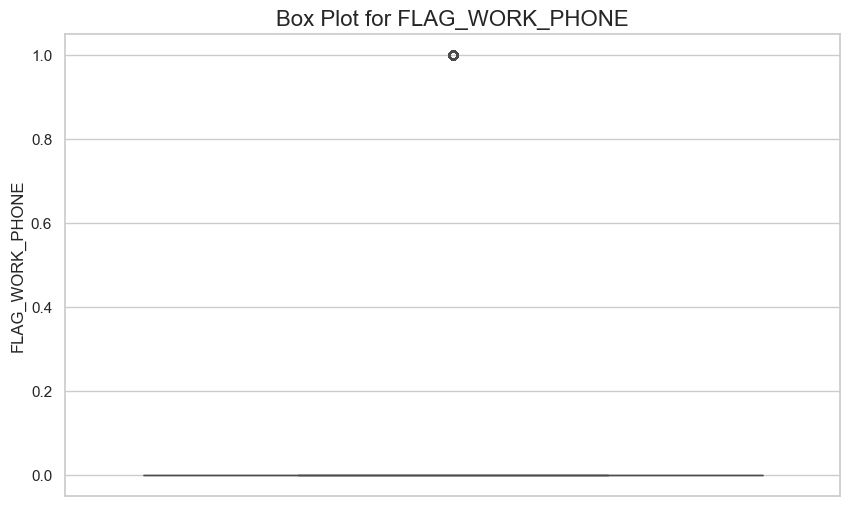

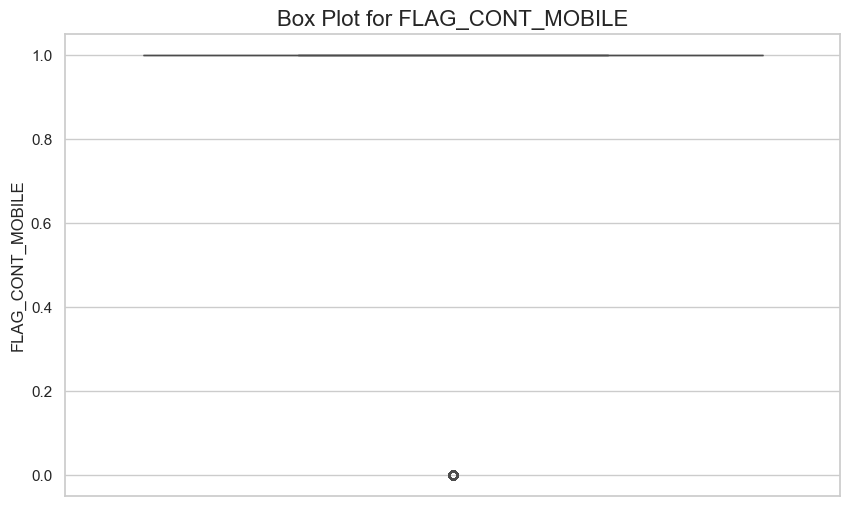

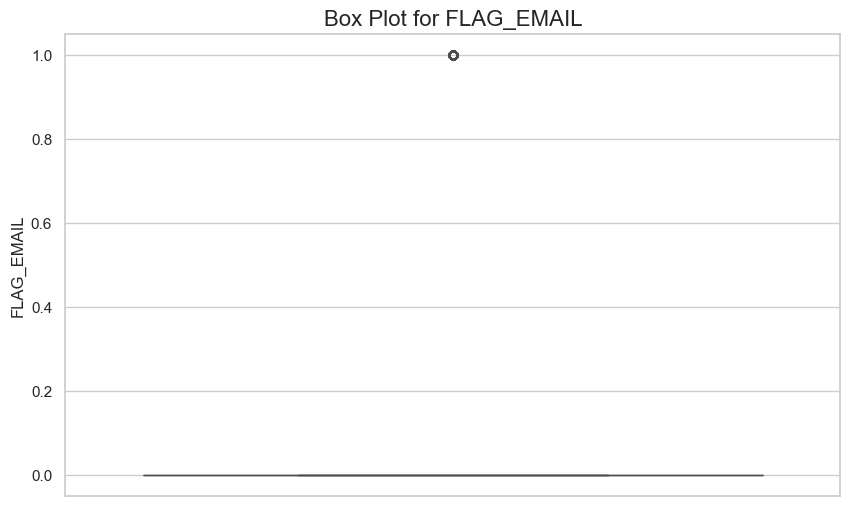

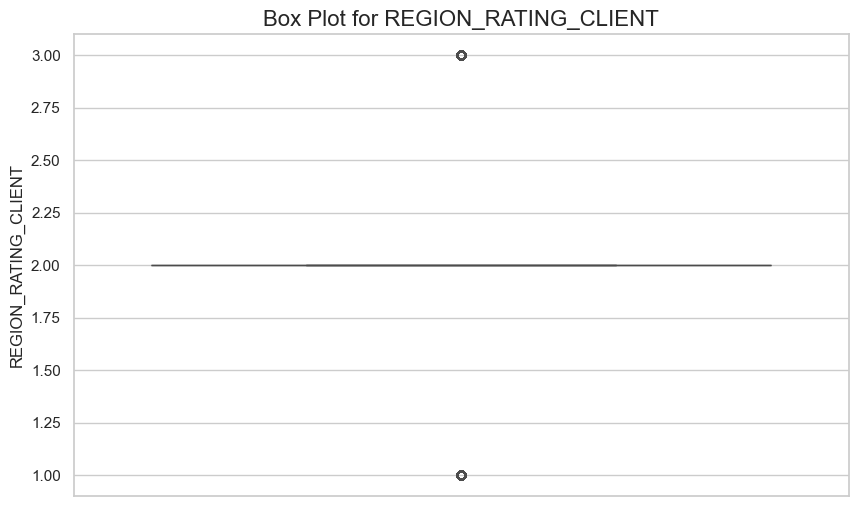

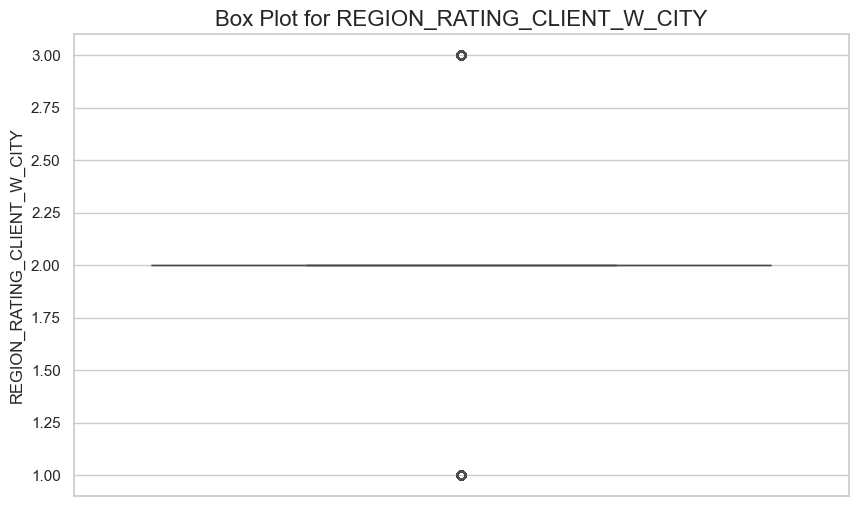

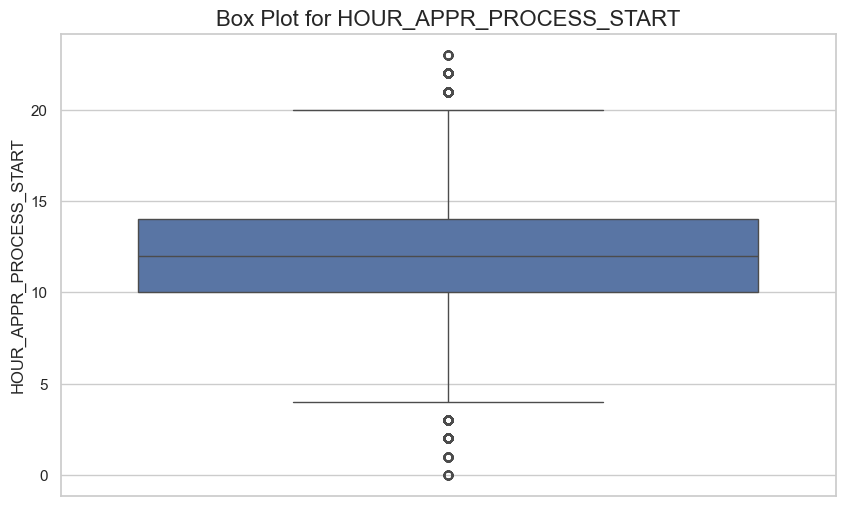

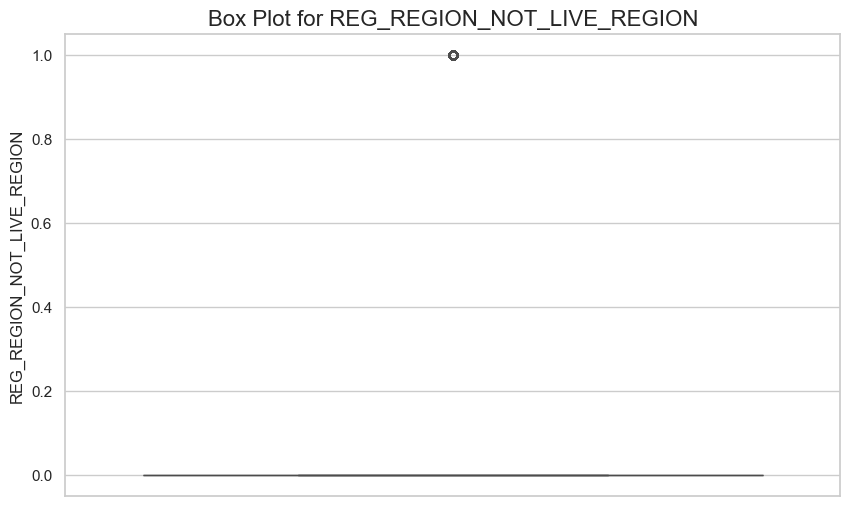

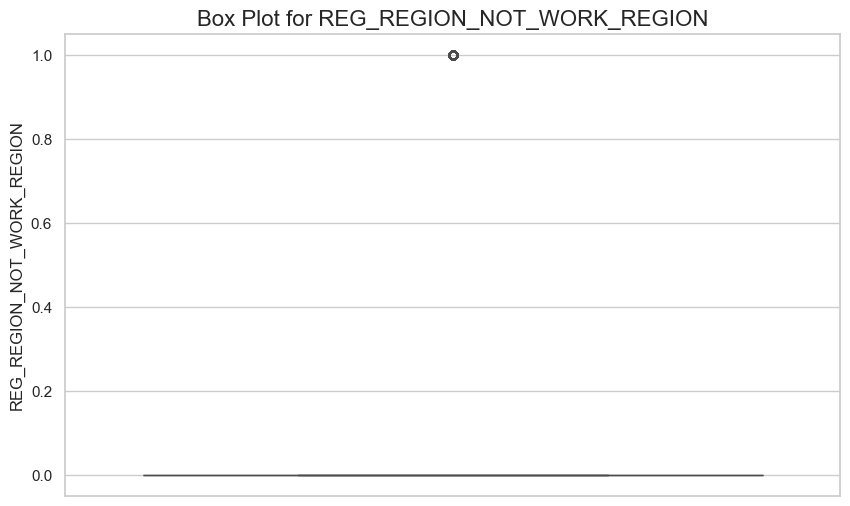

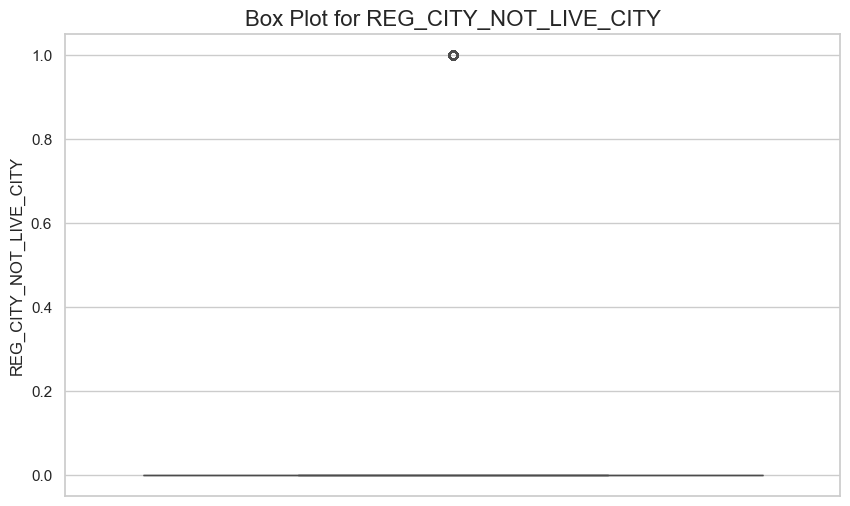

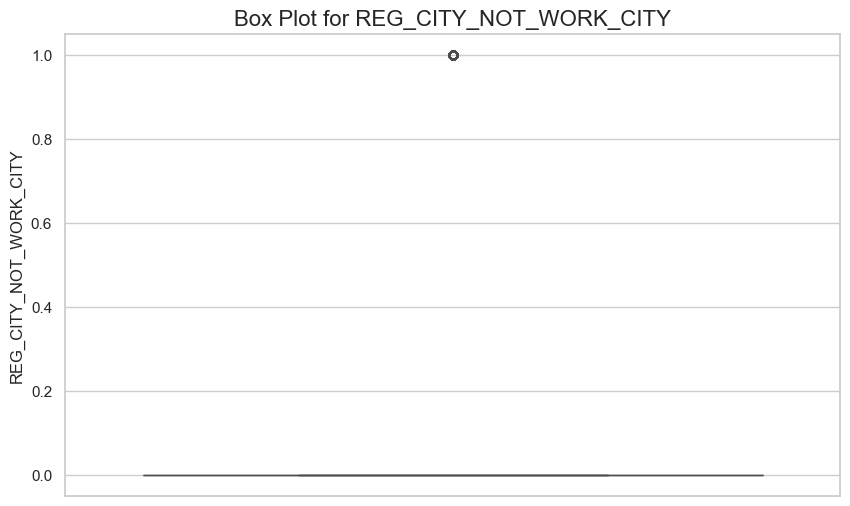

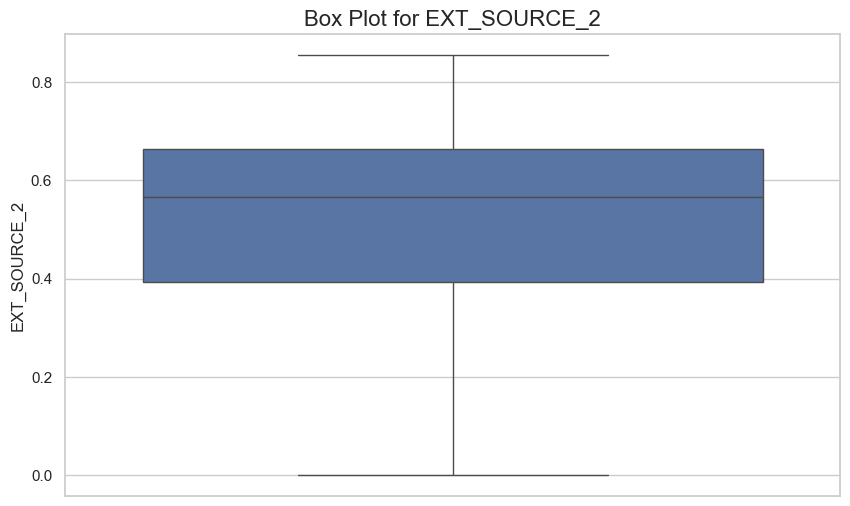

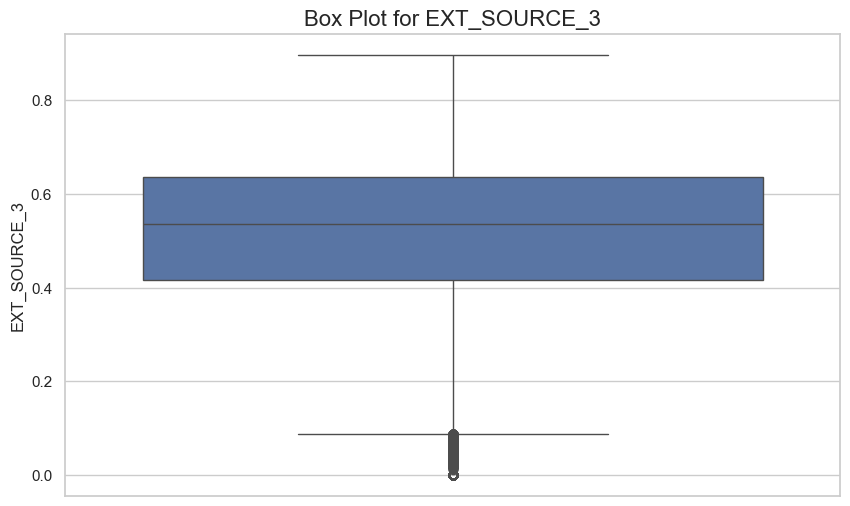

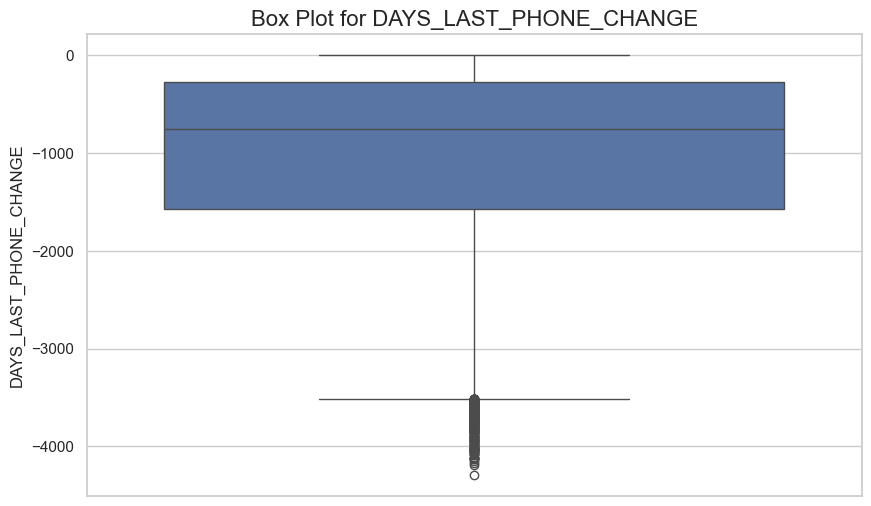

In [1237]:
# Plot a boxplot for each numeric column to visualize outliers
for column in outlier_df.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Box Plot for {column}', fontsize=16)
    sns.boxplot(outlier_df[column])
    plt.show()

> Above box plot for **CNT_CHILDREN** shows a large outlier(19). SInce a family cannot or very rare to have 19 children.

>In the **DAYS_EMPLOYED** there is a value present at 36k range, this wont be possible.This could have occured during data entry 

>In the plot **AMT_INCOME_TOTAL**, we can vicually see that the MAX amount is way largert than the other statistical datas[Mean,(25,50,75)percentiles]

In [1116]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

In [1117]:
cleaned_df=remove_outliers(outlier_df,outlier_df.columns)

# Check the cleaned dataset
print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")

Original dataset size: (307511, 28)
Cleaned dataset size: (66931, 28)


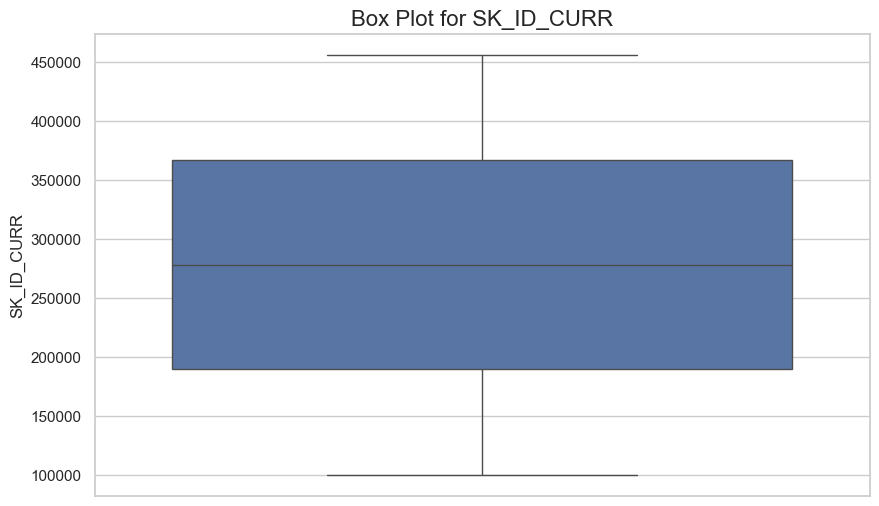

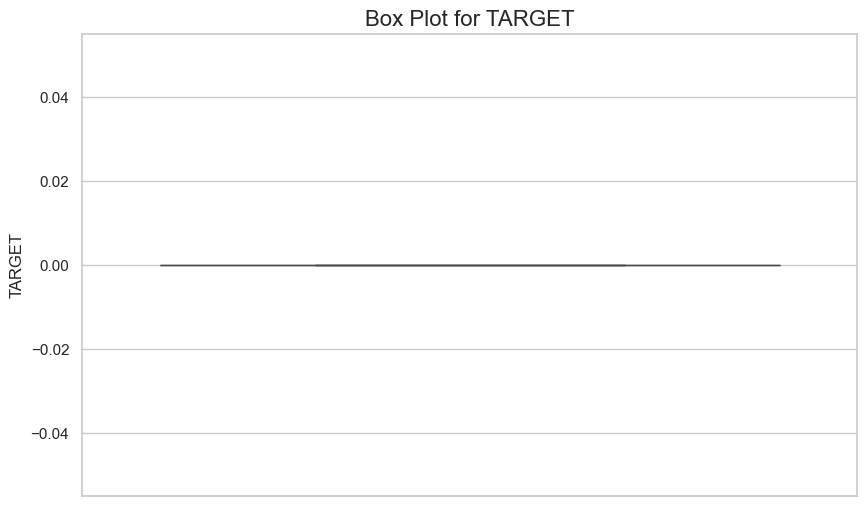

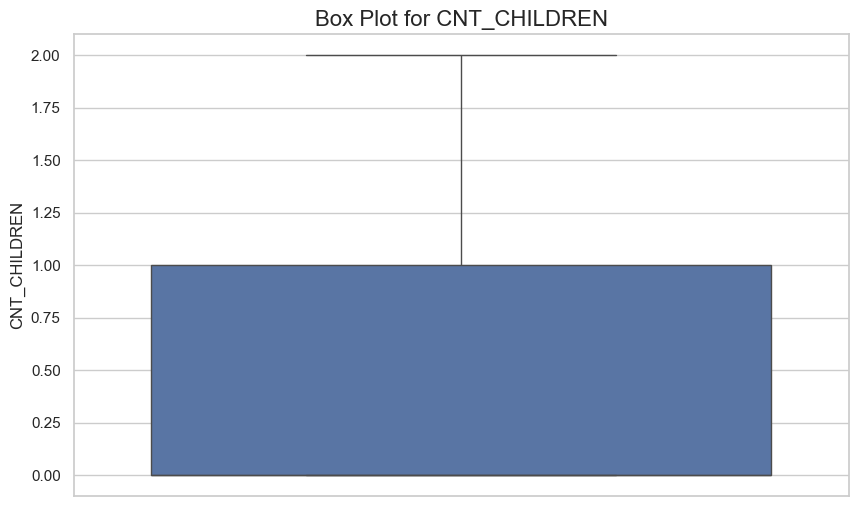

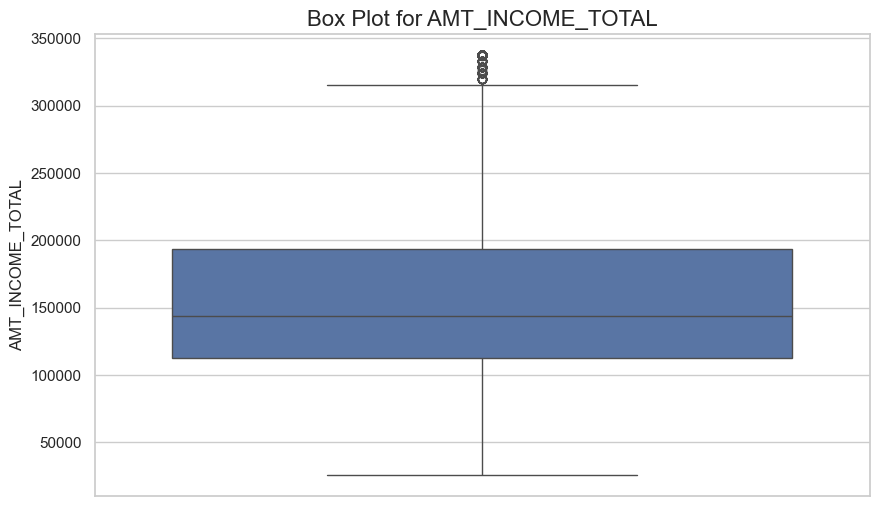

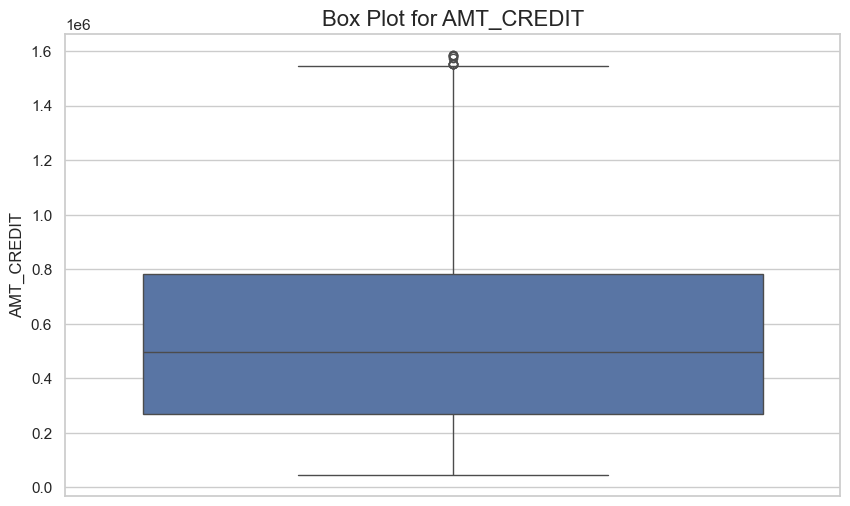

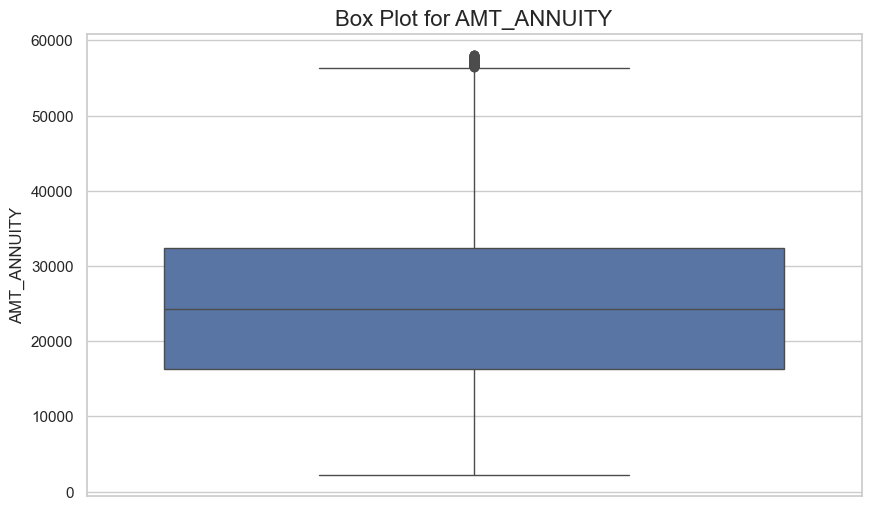

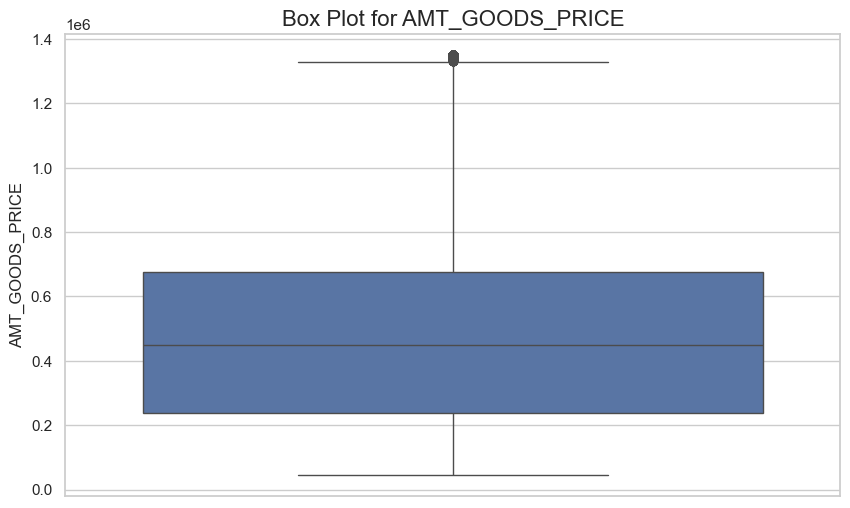

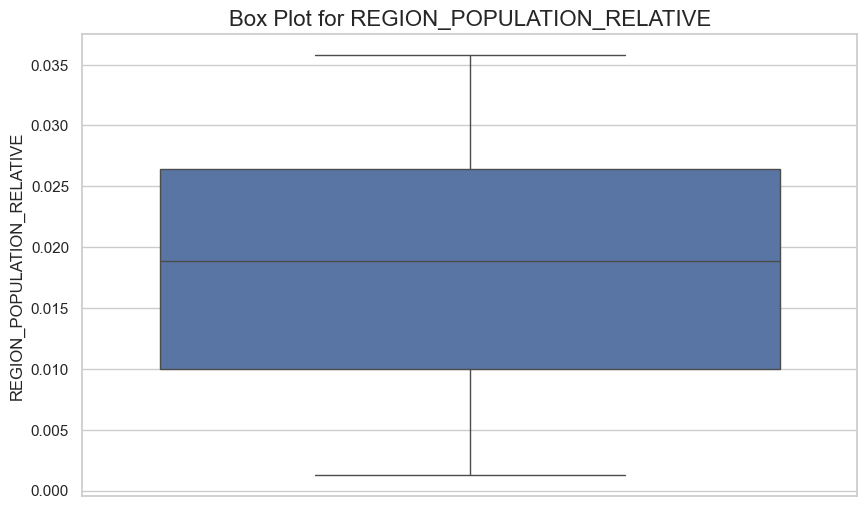

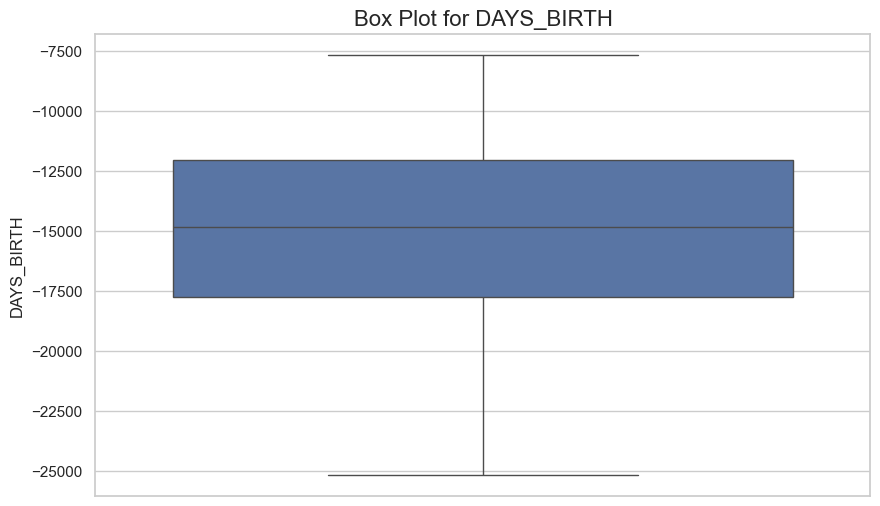

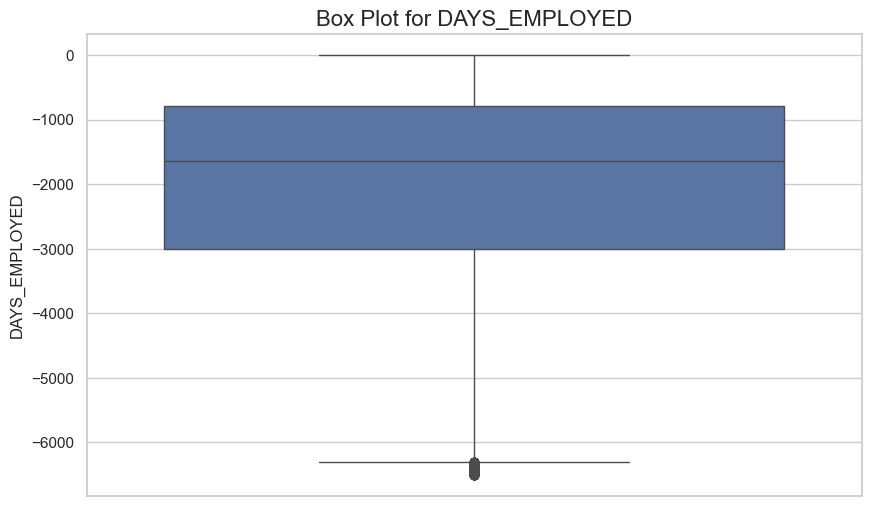

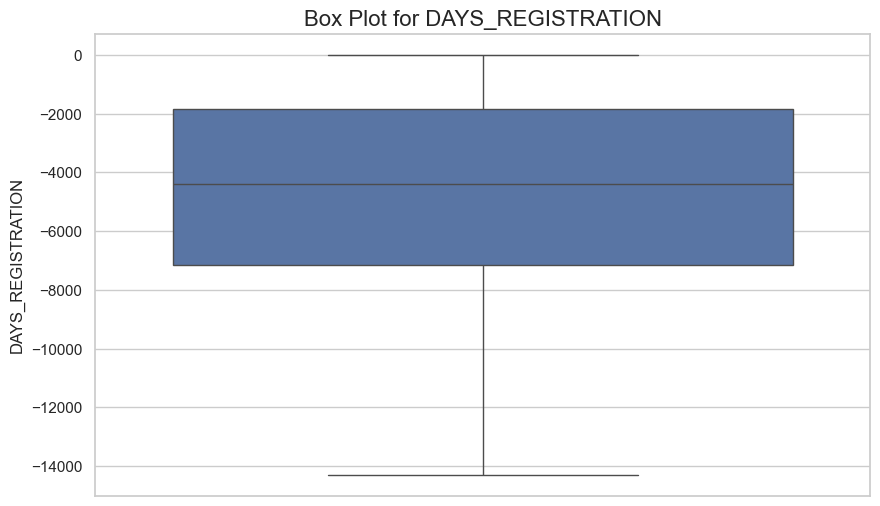

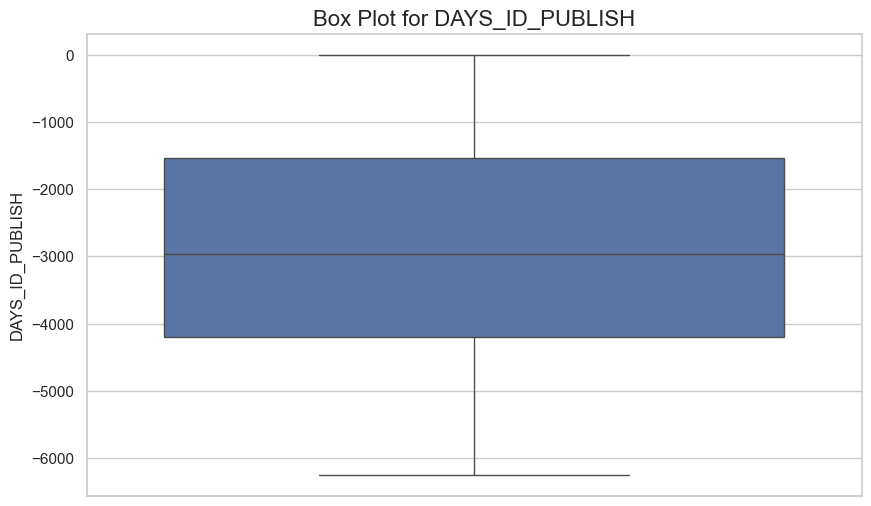

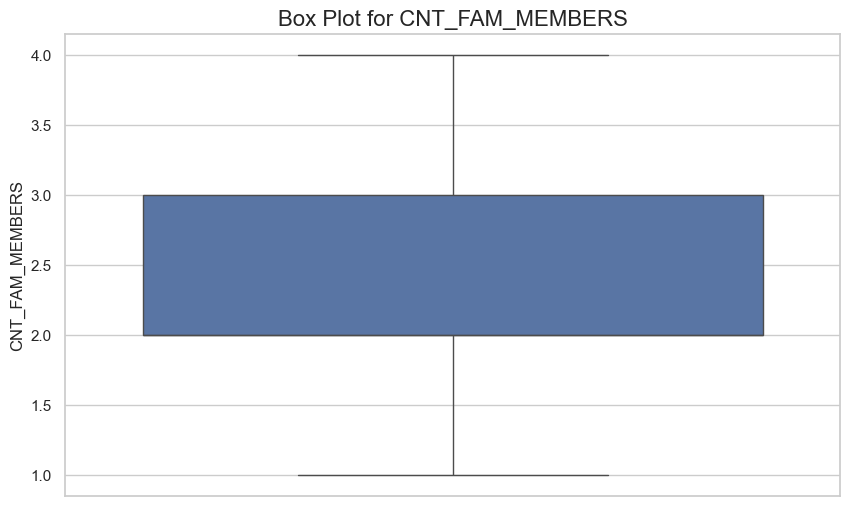

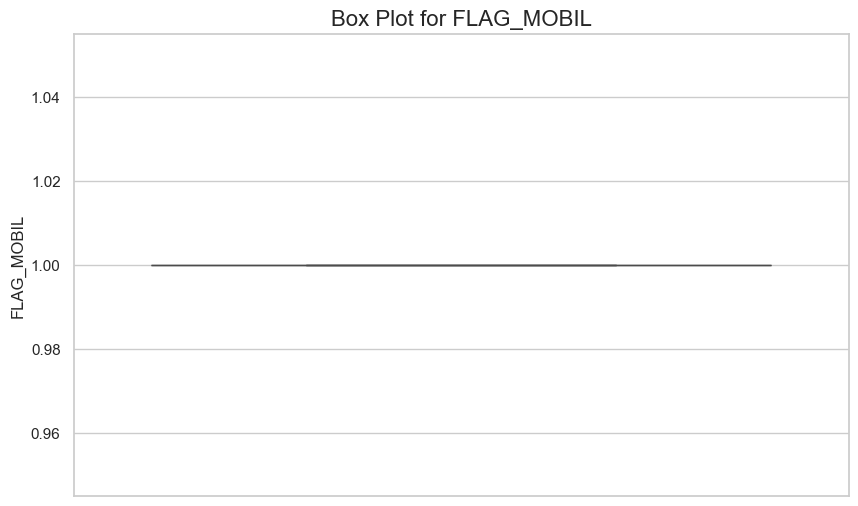

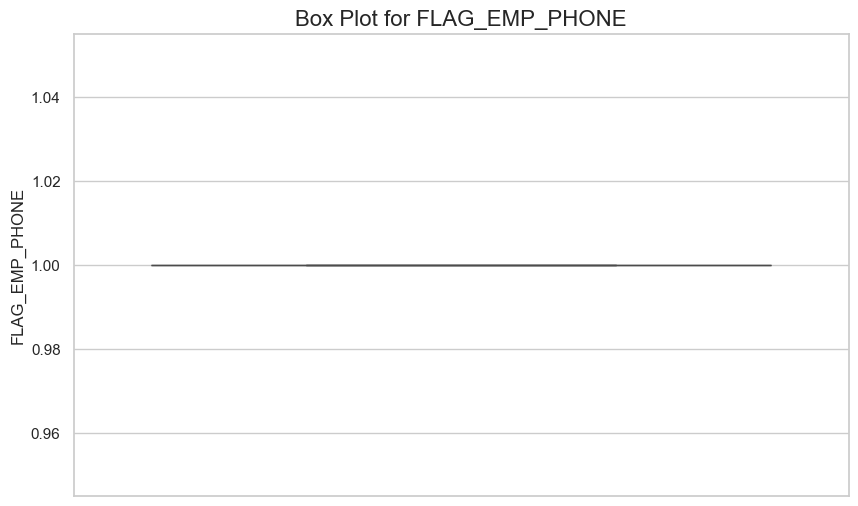

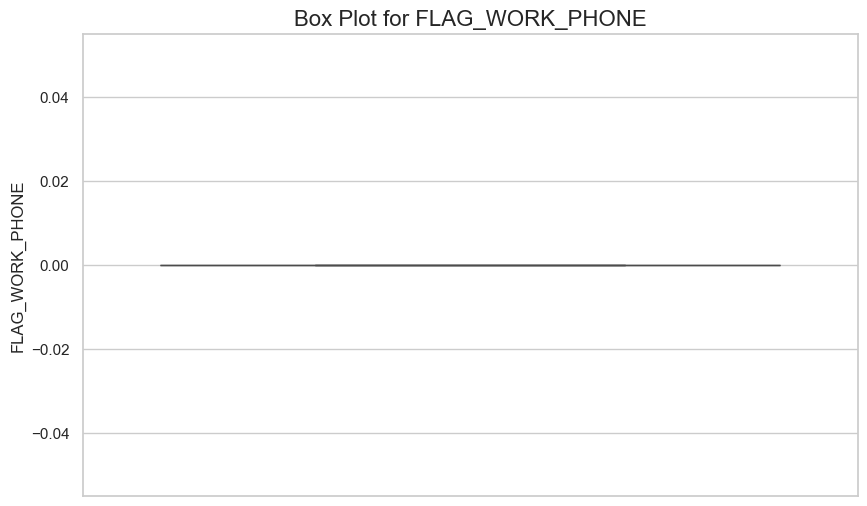

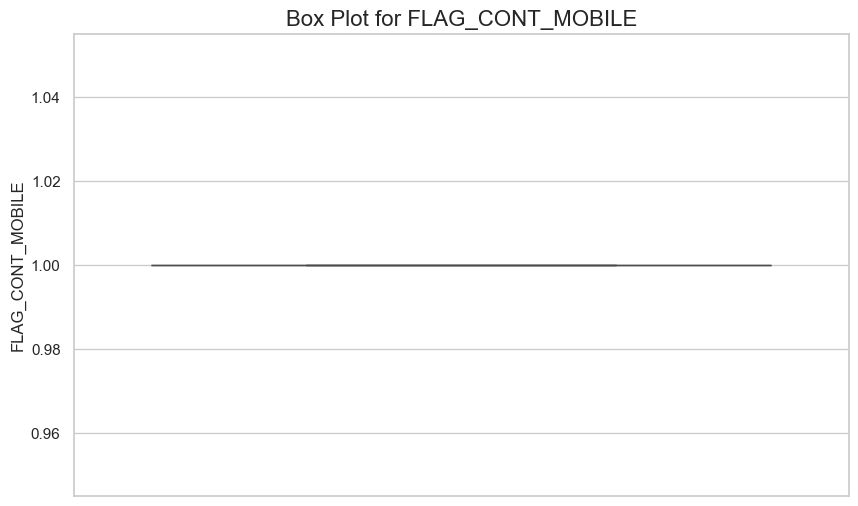

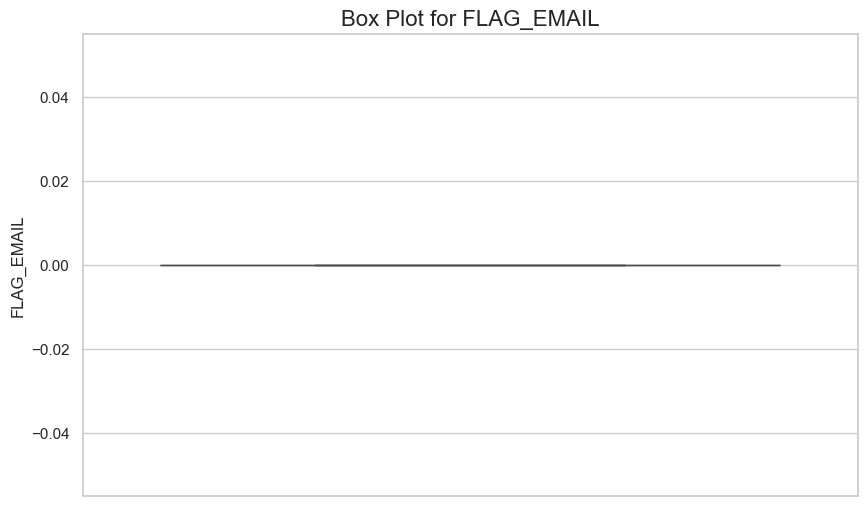

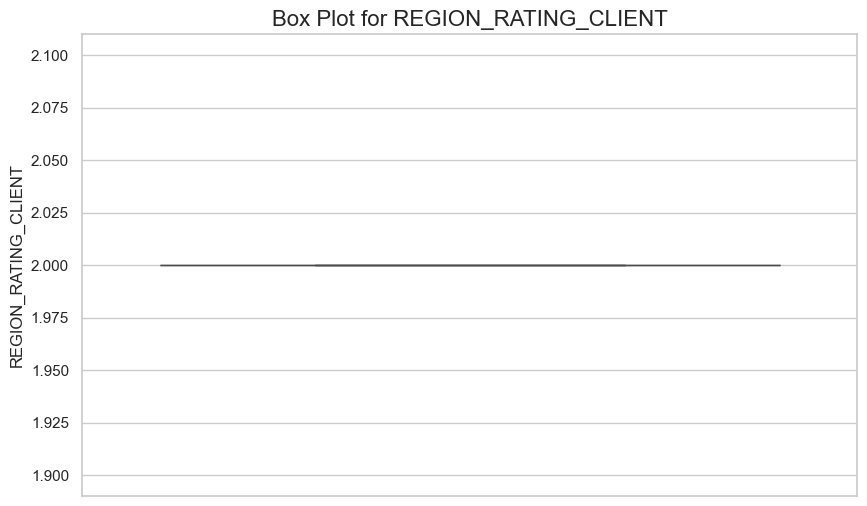

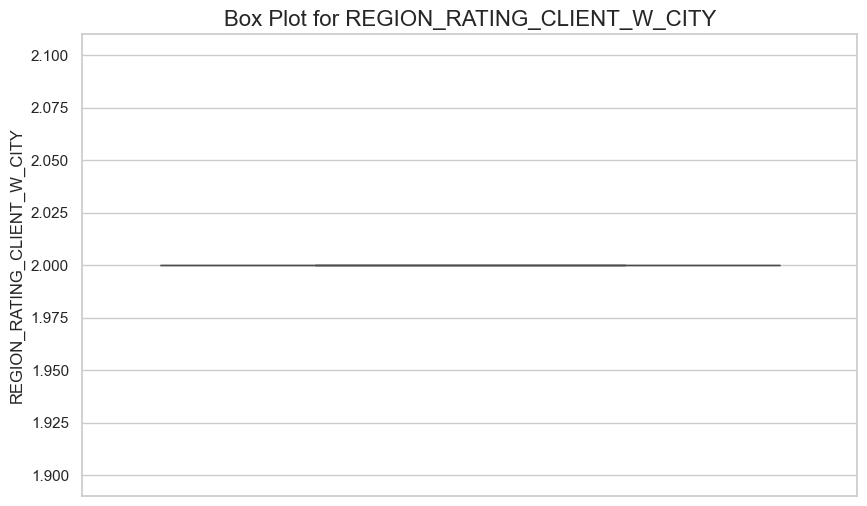

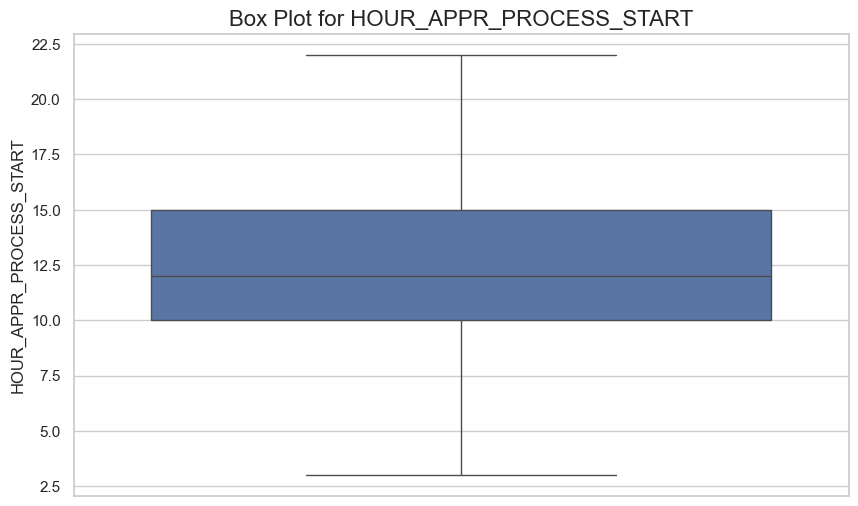

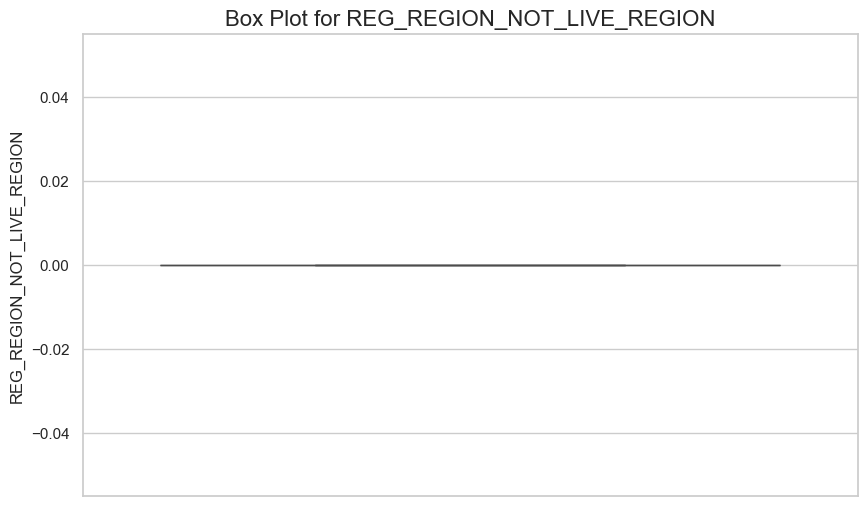

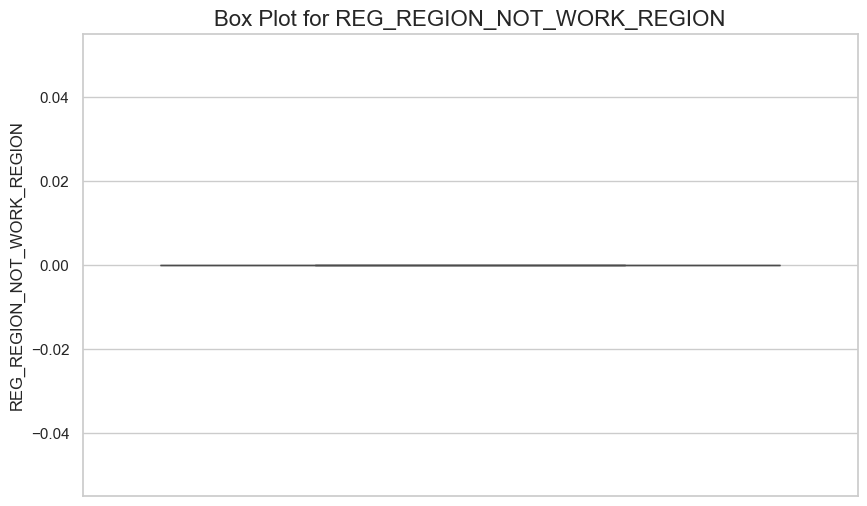

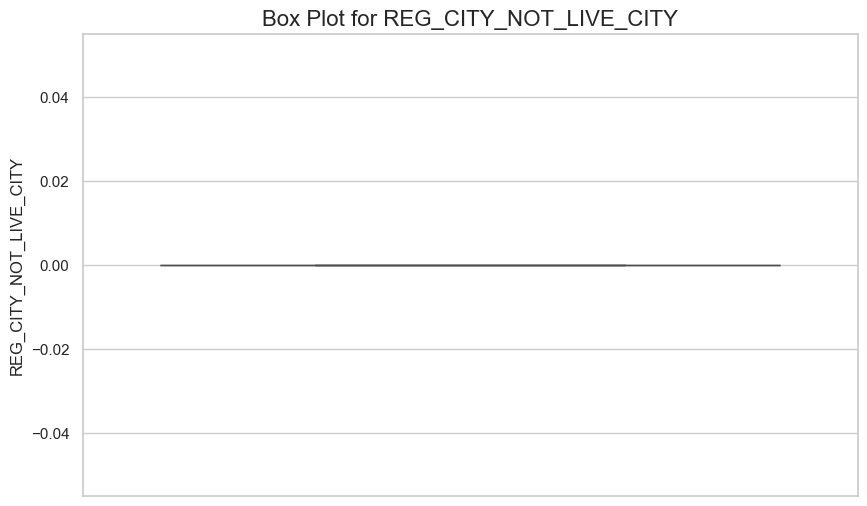

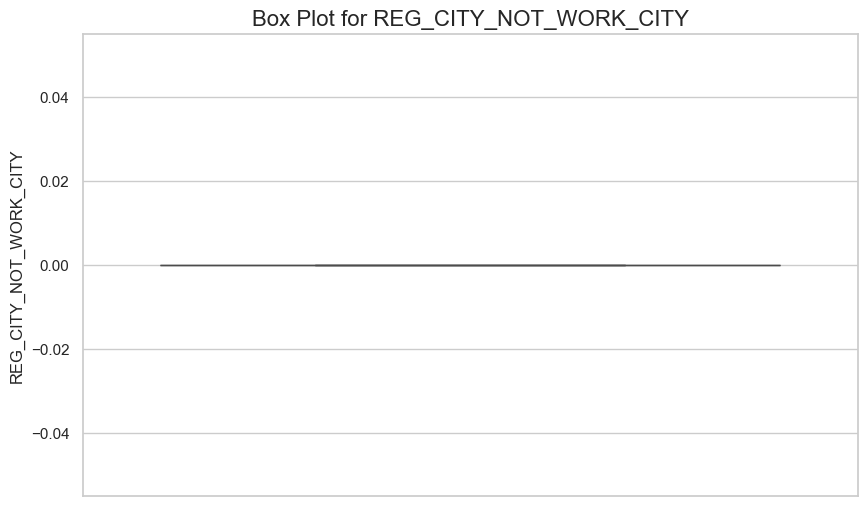

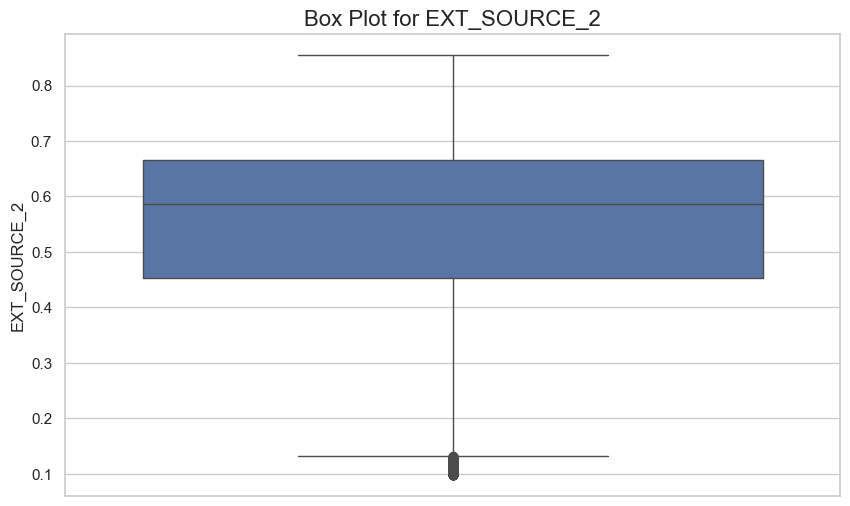

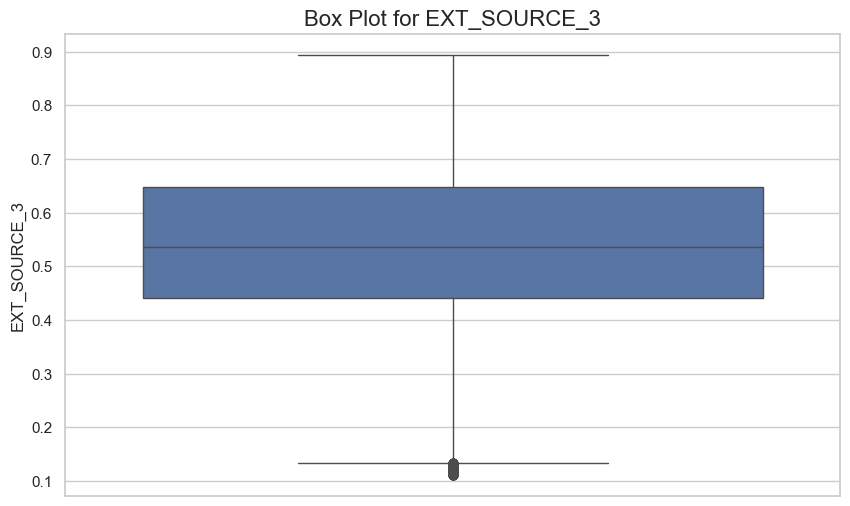

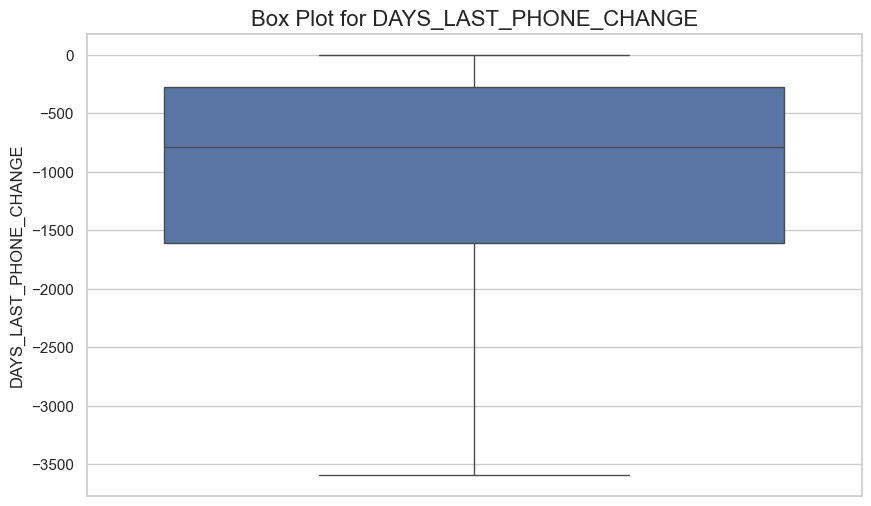

In [1239]:
# Plot a boxplot for each numeric column to visualize outliers
for column in cleaned_df.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Box Plot for {column}', fontsize=16)
    sns.boxplot(cleaned_df[column])
    plt.show()

##### So after all operations we have our dataset ready

In [1119]:
application_df.shape

(307511, 40)

In [1120]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0


### UNIVARIATE ANALYSIS

In [1121]:
application_df['AGE']= application_df['DAYS_BIRTH'].apply(lambda x : round(abs(x)/365))

In [1122]:
application_df['AGE']

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: AGE, Length: 307511, dtype: int64

In [1123]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55


In [1124]:
# We have already made new column AGE so there is no need of DAYS_BIRTH column
application_df.drop(['DAYS_BIRTH'],axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,0.535276,-273.0,26
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,365243,-4388.0,-4090,Cleaning staff,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,0.535276,0.0,57
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-7921,-6737.0,-5150,Managers,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0,41
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-4786,-2562.0,-931,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0,33


#### BINNING SALARY AMOUNT TO CATEGORIES FOR MORE CLARITY

In [1125]:
application_df['AMT_INCOME_TOTAL'].quantile([0.25,0.5,0.85,1])

0.25       112500.0
0.50       147150.0
0.85       234000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [1126]:
application_df.shape

(307511, 41)

In [1127]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,0.535276,-273.0,26
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Cleaning staff,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,0.535276,0.0,57
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0,41
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0,33


In [1128]:
# Based on the Quantile Values, segregating the values to its respective categories

def salary_category_func(x):
    if x>234000:
        return ('HIGH')
    if x<234000 and x>=147150:
        return ('MODERATE')
    if x<147150 and x>=112500:
        return ('LOW')
    else:
        return ('EXTREMELY LOW')
    
application_df['SALARY_CATEGORY']=application_df['AMT_INCOME_TOTAL'].apply(salary_category_func)
application_df['SALARY_CATEGORY']

0              MODERATE
1                  HIGH
2         EXTREMELY LOW
3                   LOW
4                   LOW
              ...      
307506         MODERATE
307507    EXTREMELY LOW
307508         MODERATE
307509         MODERATE
307510         MODERATE
Name: SALARY_CATEGORY, Length: 307511, dtype: object

In [1129]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,SALARY_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26,MODERATE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52,EXTREMELY LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,0.535276,-273.0,26,MODERATE
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Cleaning staff,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,0.535276,0.0,57,EXTREMELY LOW
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0,41,MODERATE
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0,33,MODERATE


In [1130]:
application_df.shape

(307511, 42)

In [1131]:
application_df['SALARY_CATEGORY'].value_counts()

SALARY_CATEGORY
MODERATE         106966
LOW               84194
EXTREMELY LOW     70225
HIGH              46126
Name: count, dtype: int64

In [1132]:
application_df.shape

(307511, 42)

In [1133]:
# Dropping 'AMT_TOTAL_INCOME' column because we have binned salary values
application_df.drop(['AMT_INCOME_TOTAL'],axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,SALARY_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26,MODERATE
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52,EXTREMELY LOW
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52,LOW
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,0.535276,-273.0,26,MODERATE
307507,456252,0,Cash loans,F,N,Y,0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Cleaning staff,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,0.535276,0.0,57,EXTREMELY LOW
307508,456253,0,Cash loans,F,N,Y,0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0,41,MODERATE
307509,456254,1,Cash loans,F,N,Y,0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0,33,MODERATE


In [1134]:
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,SALARY_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,26,MODERATE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,0.535276,-828.0,46,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0,52,EXTREMELY LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,52,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,0.535276,-1106.0,55,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,0.535276,-273.0,26,MODERATE
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Cleaning staff,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,0.535276,0.0,57,EXTREMELY LOW
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0,41,MODERATE
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0,33,MODERATE


### Analysing the count of `Target` variables

<Axes: xlabel='TARGET', ylabel='count'>

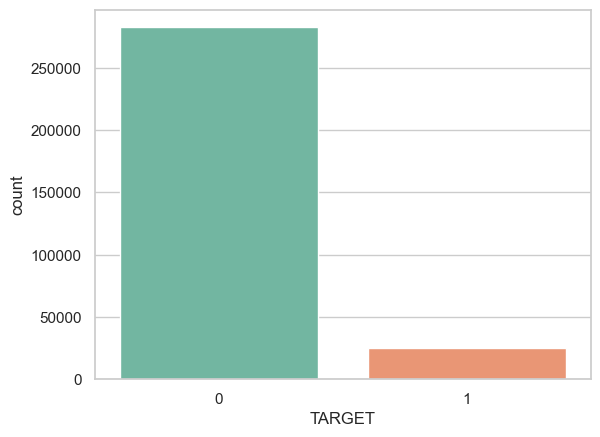

In [1135]:
sns.countplot(x='TARGET',data=application_df,palette='Set2')

 > We can see there is a huge imbalance in out Target variable. So we can segregate the Target variable into two different dataframes

### Dividing the Application into Two Dataframes based on the Target Variable

In [1136]:
good_client=application_df[application_df['TARGET']==0]
defaulter_client=application_df[application_df['TARGET']==1]

In [1137]:
good_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  int64  
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  int64  
 7   AMT_INCOME_TOTAL             282686 non-null  float64
 8   AMT_CREDIT                   282686 non-null  float64
 9   AMT_ANNUITY                  282686 non-null  float64
 10  AMT_GOODS_PRICE              282686 non-null  float64
 11  NAME_TYPE_SUITE              282686 non-null  object 
 12  NAME_INCOME_TYPE             282686 non-null  object 
 13  NAME

In [1138]:
defaulter_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  int64  
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24825 non-null  float64
 11  NAME_TYPE_SUITE              24825 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_TYPE 

### Check for clients who are unlikely to pay the loans

In [1139]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_num_1_df=defaulter_client.select_dtypes(numerics)
Univariate_defaulter_num_1_df
Univariate_defaulter_num_1_df.drop(['DAYS_BIRTH','AMT_INCOME_TOTAL'],axis=1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,1.0,1,1,0,1,0,2,2,10,0,0,0,0,0.262949,0.139376,-1134.0,26
26,100031,1,0,979992.0,27076.5,702000.0,0.018029,-2628,-6573.0,-1827,1.0,1,1,0,1,0,3,2,9,0,0,0,0,0.548477,0.190706,-161.0,51
40,100047,1,0,1193580.0,35028.0,855000.0,0.025164,-1262,-1182.0,-1029,2.0,1,1,0,1,0,2,2,9,0,0,0,0,0.306841,0.320163,-1075.0,48
42,100049,1,0,288873.0,16258.5,238500.0,0.007305,-3597,-45.0,-4409,2.0,1,1,1,1,0,3,3,11,0,0,0,0,0.674203,0.399676,-1480.0,37
81,100096,1,0,252000.0,14593.5,252000.0,0.028663,365243,-5391.0,-4199,2.0,1,0,0,1,0,2,2,10,0,0,0,0,0.023952,0.720944,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1,450000.0,32746.5,450000.0,0.020246,-3048,-8507.0,-2580,3.0,1,1,1,1,0,3,3,16,0,0,0,0,0.329708,0.360613,-324.0,27
307475,456215,1,1,1303200.0,46809.0,1125000.0,0.007330,-2405,-500.0,-4704,3.0,1,1,1,1,0,2,2,13,0,0,0,0,0.583214,0.424130,-1492.0,37
307481,456225,1,0,297000.0,19975.5,297000.0,0.008575,-3147,-8921.0,-3832,2.0,1,1,0,1,0,2,2,15,0,0,0,0,0.713524,0.511892,-2941.0,57
307489,456233,1,0,521280.0,23089.5,450000.0,0.014464,-286,-8291.0,-9,2.0,1,1,0,1,0,2,2,5,0,0,0,0,0.615261,0.397946,-307.0,45


In [1140]:
categorical=['object']
Univariate_defaulter_cat_1_df=defaulter_client.select_dtypes(categorical)
Univariate_defaulter_cat_1_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SALARY_CATEGORY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,MODERATE
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,MONDAY,Business Entity Type 3,LOW
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,MODERATE
42,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,THURSDAY,Self-employed,LOW
81,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,Cleaning staff,THURSDAY,XNA,EXTREMELY LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Business Entity Type 3,MODERATE
307475,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,Laborers,THURSDAY,Construction,LOW
307481,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Managers,FRIDAY,Business Entity Type 3,MODERATE
307489,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,MODERATE


**_FLAG_OWN_REALTY_**

We will compare and check how the possesion of a property affects the repayment of loans. 

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

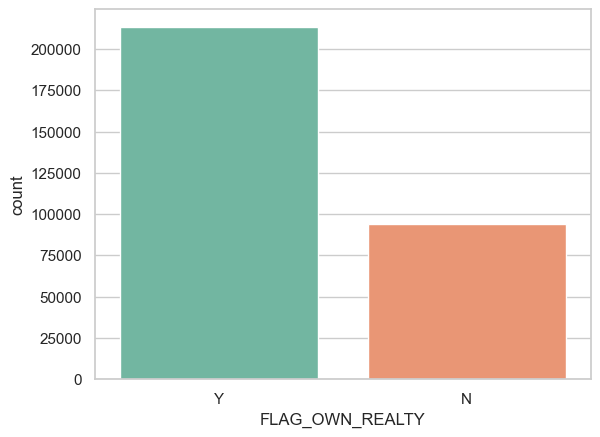

In [1141]:
#Graph to plot Number of property owners and non-property owners in the entire polulation
sns.countplot(x='FLAG_OWN_REALTY',data=application_df,palette='Set2')

We can see from the above plot that people who are involved in real estate buisness are likely to be defaulter

In [1142]:
# application_df['FLAG_OWN_REALTY'].value_counts().plot(
#     kind='pie', 
#     autopct='%1.1f%%', 
#     labels=['Owners','Non-Owners'],  # Custom labels
#     colors=['skyblue', 'orange'],    # Custom colors
# )
# plt.title('Percentage of Property and Non-Property Owners', fontsize=14)
# plt.ylabel('')  # Removes y-axis label for cleaner look
# plt.show()


In [1143]:
# Calculate the percentage of property and non-property owners in the defaulter list
test_df1 = (
    (Univariate_defaulter_cat_1_df["FLAG_OWN_REALTY"].value_counts() /
     application_df["FLAG_OWN_REALTY"].value_counts()) * 100
).round(2).reset_index()

# Rename the columns for clarity
test_df1.columns = ["FLAG_OWN_REALTY", "DEFAULT_PERCENTAGE"]

# Display the result
print(test_df1)


  FLAG_OWN_REALTY  DEFAULT_PERCENTAGE
0               Y                7.96
1               N                8.32


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='DEFAULT_PERCENTAGE'>

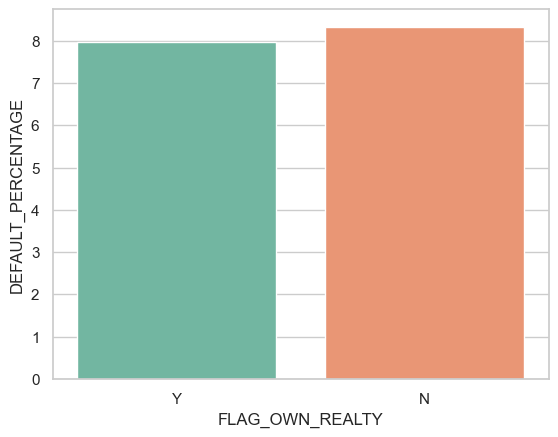

In [1144]:
sns.barplot(x='FLAG_OWN_REALTY',y='DEFAULT_PERCENTAGE',data=test_df1,palette='Set2')

From above graph, we can see that the number of non-payers of loan i.e., defaulters are very close almost equal to 9%. It is difficult to decide a target based on this metric.

**_CODE_GENDER_**

Let's compare and check how the gender of client affects the repayment of loans.

In [1145]:
# Step 1: Calculate the value counts
gender_counts = application_df['CODE_GENDER'].value_counts()

threshold=100
# Step 3: Identify values that meet the threshold
valid_genders = gender_counts[gender_counts > threshold].index

# Step 4: Filter the DataFrame to keep only valid genders
application_df = application_df[application_df['CODE_GENDER'].isin(valid_genders)]

print(application_df['CODE_GENDER'].value_counts())


CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64


Text(0, 0.5, '')

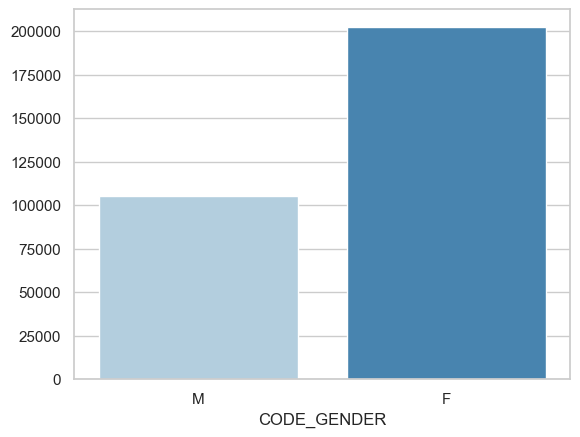

In [1146]:
sns.countplot(x='CODE_GENDER',data=application_df,palette='Blues')
plt.ylabel('')

In [1147]:
# Calculate the percentage of male and female owners in the defaulter list
test_df2 = (
    (Univariate_defaulter_cat_1_df["CODE_GENDER"].value_counts() /
     application_df["CODE_GENDER"].value_counts()) * 100
).round(2).reset_index()

# Rename the columns for clarity
test_df2.columns = ["CODE_GENDER", "DEFAULT_PERCENTAGE"]

# Display the result
print(test_df2)


  CODE_GENDER  DEFAULT_PERCENTAGE
0           F                7.00
1           M               10.14


<Axes: xlabel='CODE_GENDER', ylabel='DEFAULT_PERCENTAGE'>

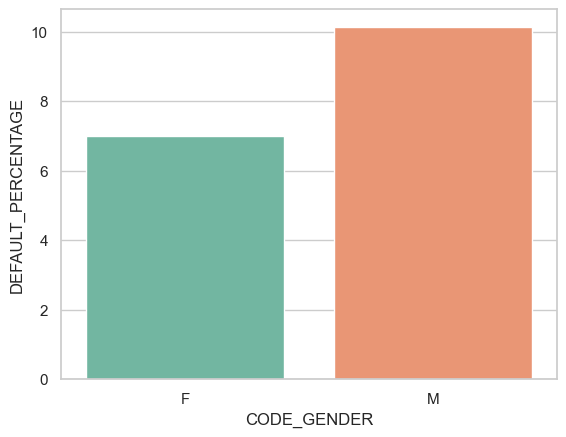

In [1148]:
sns.barplot(x='CODE_GENDER',y='DEFAULT_PERCENTAGE',data=test_df2,palette='Set2')

So, from above plots and data we can cleary see that the Female clients are a better TARGET as compared to the Male clients. Observing the percent of defaulted credits, male client have a higher chance of not returning their loans [10.14%], compared to the female clients [7%].

**_FLAG_OWN_CAR_**

Text(0, 0.5, '')

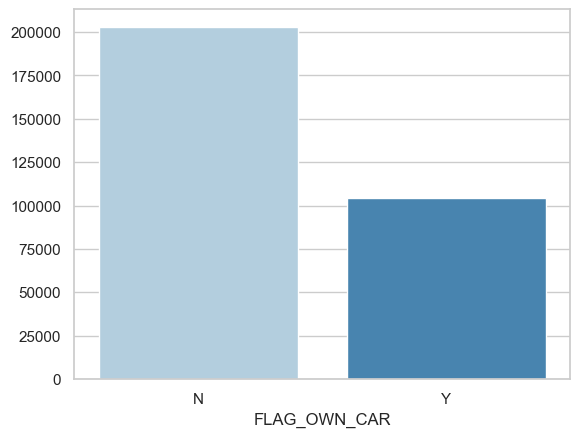

In [1149]:
sns.countplot(x='FLAG_OWN_CAR',data=application_df,palette='Blues')
plt.ylabel('')

In [1150]:
# Calculate the percentage of car owners in the defaulter list
test_df3 = (
    (Univariate_defaulter_cat_1_df["FLAG_OWN_CAR"].value_counts() /
     application_df["FLAG_OWN_CAR"].value_counts()) * 100
).round(2).reset_index()

# Rename the columns for clarity
test_df3.columns = ["FLAG_OWN_CAR", "DEFAULT_PERCENTAGE"]

# Display the result
print(test_df3)


  FLAG_OWN_CAR  DEFAULT_PERCENTAGE
0            N                8.50
1            Y                7.24


<Axes: xlabel='FLAG_OWN_CAR', ylabel='DEFAULT_PERCENTAGE'>

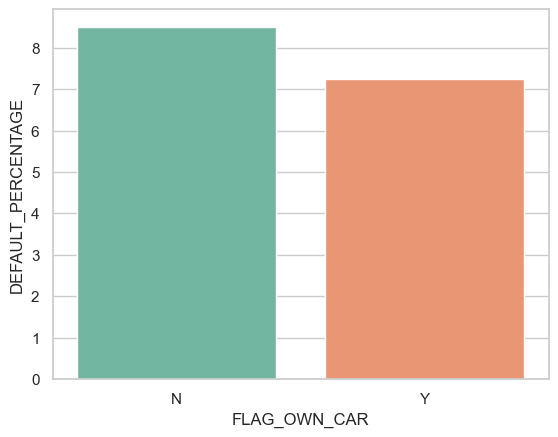

In [1151]:
sns.barplot(x='FLAG_OWN_CAR',y='DEFAULT_PERCENTAGE',data=test_df3,palette='Set2')

As we can see from above graph,the clients that own a car are less likely to not repay the loan when compared to the ones that do not own a car. The loan non-repayment rates of both the Car Owners and Non-Car Owners are very close. Which is interesting to see and indicates that probably this metric will not be a suitable one when targeting a client.

**_NAME_FAMILY_STATUS_**

Let's compare and check how the family status of clients affect their repayment of loans.

In [1152]:
# Get value counts and convert to DataFrame
status = application_df['NAME_FAMILY_STATUS'].value_counts().reset_index()

# Rename the columns
status.columns = ['NAME_FAMILY_STATUS', 'number']

# Display the result
print(status)


     NAME_FAMILY_STATUS  number
0               Married  196429
1  Single / not married   45444
2        Civil marriage   29774
3             Separated   19770
4                 Widow   16088
5               Unknown       2


<function matplotlib.pyplot.show(close=None, block=None)>

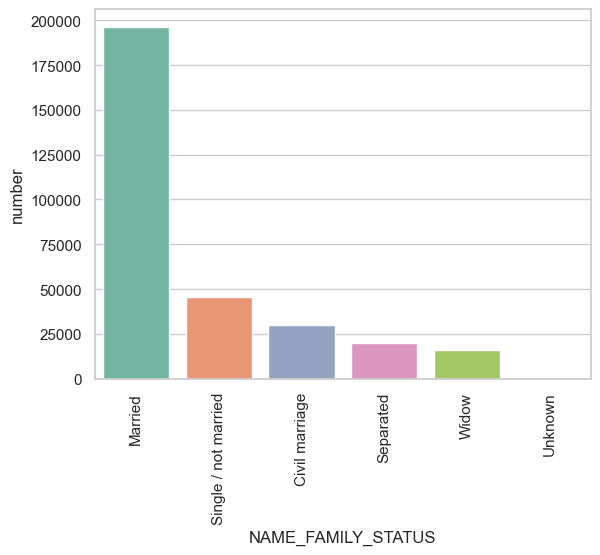

In [1153]:
#graph to plot family status of clients in the entire polulation
FamilyStatus_vs_Total = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =status,palette='Set2')
FamilyStatus_vs_Total.set_xticklabels(FamilyStatus_vs_Total.get_xticklabels(),rotation=90)
plt.show

Here from the bar chart it is evident that most of the clients are Married, followed by Single and Civil marriage

In [1154]:
# Calculate the percentage of defaulters by family status
test_df4 = (Univariate_defaulter_cat_1_df["NAME_FAMILY_STATUS"].value_counts() / 
            application_df["NAME_FAMILY_STATUS"].value_counts() * 100).round(2)

# Convert to DataFrame and reset index
test_df4 = test_df4.reset_index()

# Rename columns
test_df4.columns = ['NAME_FAMILY_STATUS', 'DEFAULT_PERCENTAGE']

# Sort by DEFAULT_PERCENTAGE
test_df4 = test_df4.sort_values(by='DEFAULT_PERCENTAGE', ascending=True)

# Display the result
print(test_df4)

     NAME_FAMILY_STATUS  DEFAULT_PERCENTAGE
5                 Widow                5.82
1               Married                7.56
2             Separated                8.19
3  Single / not married                9.81
0        Civil marriage                9.94
4               Unknown                 NaN


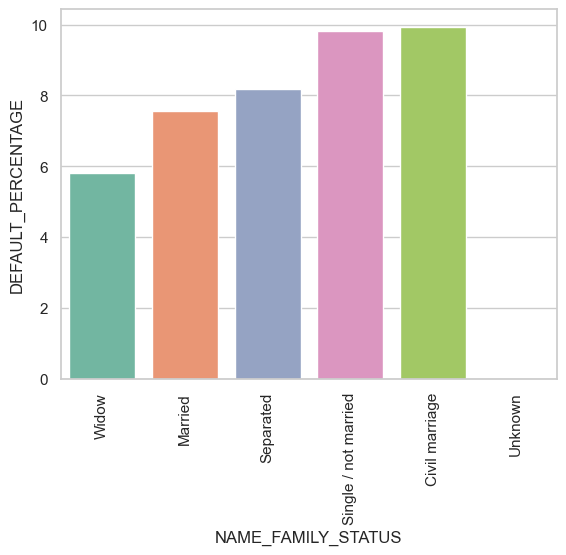

In [1155]:
#plot to show the family status of client vs. Target variable. Here, Target =1
FamilyStatus_vs_Target= sns.barplot(x="NAME_FAMILY_STATUS",y="DEFAULT_PERCENTAGE",data=test_df4,palette='Set2')
FamilyStatus_vs_Target.set_xticklabels(FamilyStatus_vs_Target.get_xticklabels(),rotation=90)
plt.show()

From above graph we can say that the percentage of non-repayment of loan is at highest for civil mariage and is lowest for widows, Which is interesting to see because you expect widows to not payback their loans but it is the opposite here.

## BIVARIATE ANALYSIS

### Salary vs Client whose Permanent Address not match with Contact Address -Region Level

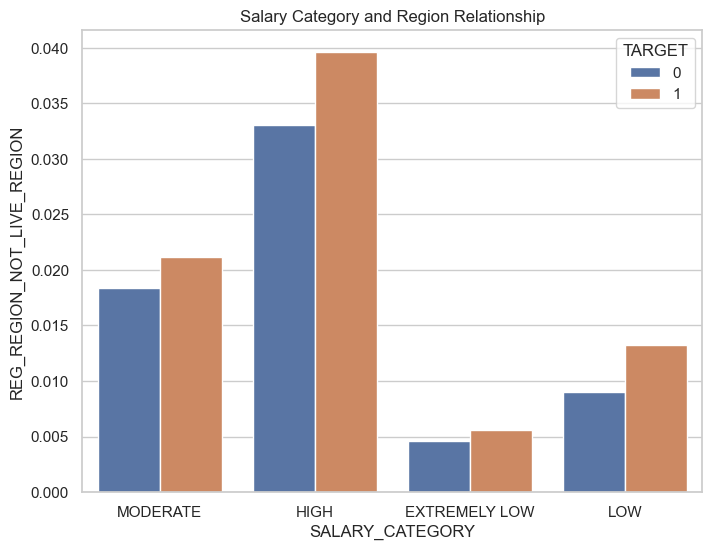

In [1156]:
# Create the plot with proper syntax
plt.subplots(figsize=(8, 6))

plot_1 = sns.barplot(x="SALARY_CATEGORY", y="REG_REGION_NOT_LIVE_REGION", hue="TARGET", data=application_df, ci=None)

plt.title("Salary Category and Region Relationship")
plt.show()


When Client gets Extremely lower salary and if his/her address doest match, then there is a Higher chance for him/her to be defaulter

### Salary vs Client whose Permanent Address not match with Contact Address -City Level

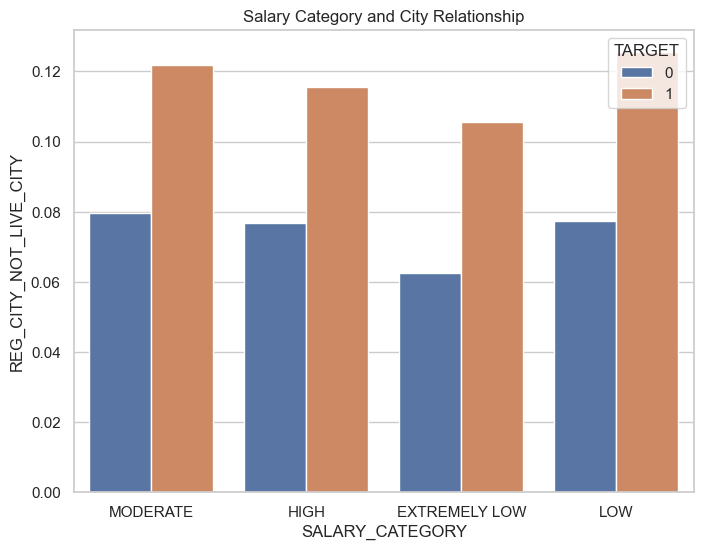

In [1157]:
# Create a figure with a specified size
plt.subplots(figsize=(8, 6))

# Plot a barplot with the hue representing the target
plot_1 = sns.barplot(x="SALARY_CATEGORY", y="REG_CITY_NOT_LIVE_CITY", hue="TARGET", data=application_df, ci=None)

# Set title for the plot
plt.title("Salary Category and City Relationship")

# Display the plot
plt.show()


When Client gets LOWER salary and if his/her CONTACT address(CITY-LEVEL)doest match, then there is a Higher chance for him/her to be defaulter

## INCOME TYPE

### Income vs Children count

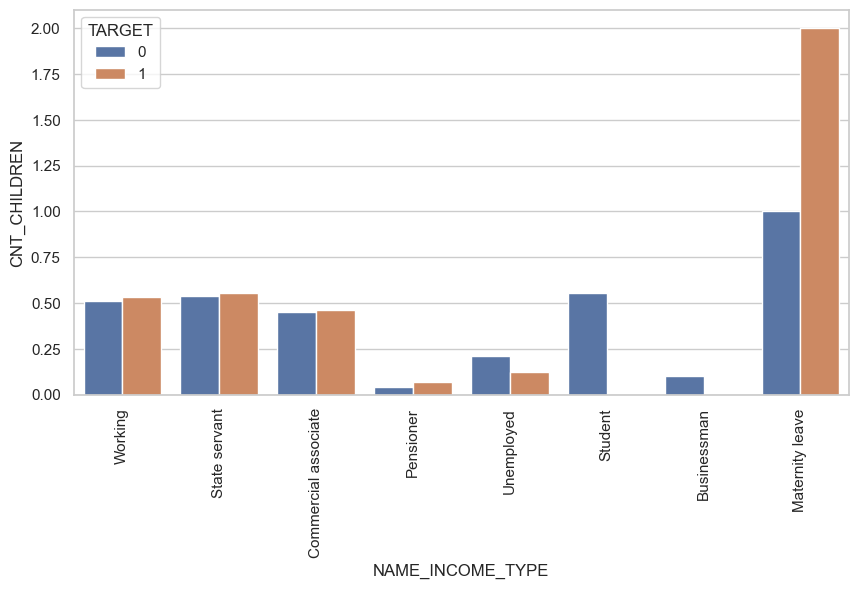

In [1158]:
# Set the figure size to 10x5
plt.subplots(figsize=(10,5))

# Create a bar plot with seaborn
plot_1 = sns.barplot(x="NAME_INCOME_TYPE", y="CNT_CHILDREN", data=application_df, hue="TARGET",ci=None)

# Rotate the x-axis tick labels by 90 degrees
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


People who geting income via Maternity Leave tends to be more Defaulter when they have more children

### Income vs No.of.FamilyMembers

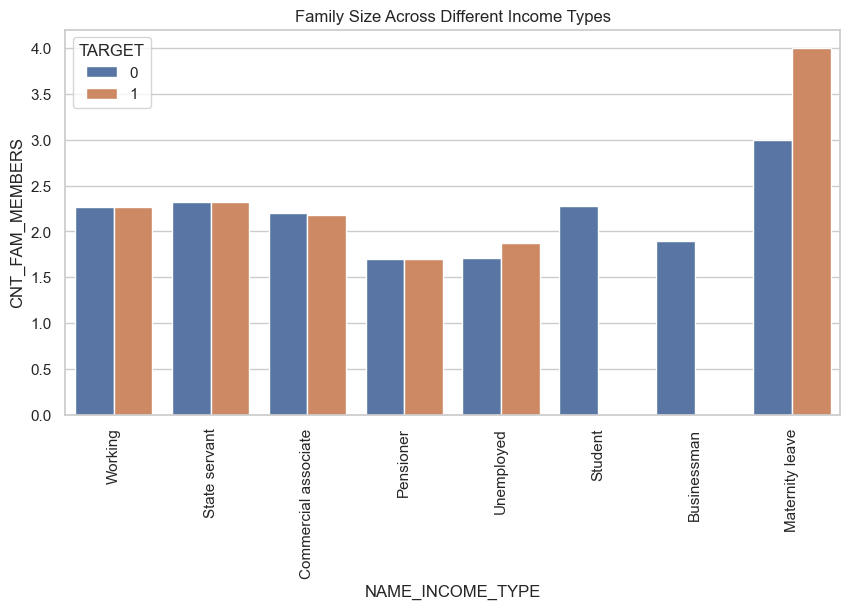

In [1159]:
# Plot the relationship between income type and family members with hue for target
plt.figure(figsize=(10,5))

# Use sns.barplot to show the relationship
plot_1 = sns.barplot(
    x="NAME_INCOME_TYPE",
    y="CNT_FAM_MEMBERS",
    data=application_df, 
    hue="TARGET",
    ci=None
)

# Rotate the x-axis labels for better readability
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

# Display the plot
plt.title('Family Size Across Different Income Types')
plt.show()


People who geting income via Maternity Leave tends to be more Defaulter when they have more Family Members

# FAMILY STATUS

### Family Status vs Count Of Children

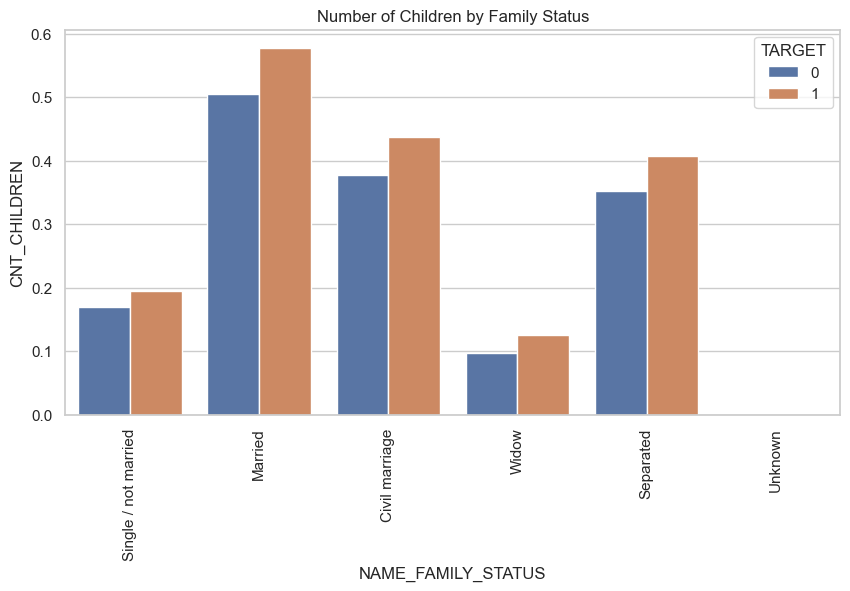

In [1160]:
# Create a plot with the specified figure size
plt.subplots(figsize=(10, 5))

# Plot the relationship between family status and the number of children, hue distinguishes defaulters
plot_1 = sns.barplot(
    x="NAME_FAMILY_STATUS",
    y="CNT_CHILDREN",
    data=application_df, 
    hue="TARGET",
    ci=None
)

# Rotate the x-axis labels for better readability
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

# Show the plot
plt.title('Number of Children by Family Status')
plt.show()


Client who are married and has more children (5+), chances to be a defaulter in High. This may be due to the Economic situation of their family, because of more children

In [1161]:
application_df.drop(["HOUR_APPR_PROCESS_START","FLAG_MOBIL",'NAME_CONTRACT_TYPE'],axis=1,inplace=True)

## ANALYSING CORRELATION OF TARGET VARIABLE VS OTHER VARIABLES

In [1162]:
# Correlation = application_df.corr()
# Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)


# Analysing Previous Application

In [1163]:
previous_data=pd.read_csv('previous_application.csv')

In [1164]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [1165]:
previous_data.shape

(1670214, 37)

In [1166]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [1167]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [1168]:
# Calculate the percentage of missing values in each column
missing_percentage = previous_data.isnull().mean()

# Filter out columns where missing percentage is greater than 20%
columns_to_drop = missing_percentage[missing_percentage > 0.2].index

# Drop the identified columns from the DataFrame
previous_data.drop(columns=columns_to_drop, axis=1, inplace=True)


In [1169]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [1170]:
previous_data.shape

(1670214, 23)

In [1197]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [1171]:
# Filling 2% missing value with the Highest Mode in PRODUCT_COMBINATION column
previous_data["PRODUCT_COMBINATION"].fillna(previous_data["PRODUCT_COMBINATION"].mode()[0],inplace=True)

### Let's start visualising so as to get some viable inference

In [1172]:
Contract_Status = previous_data['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [1191]:
#find the percentage of contract status 
df_1=round((Contract_Status.value_counts()/previous_data["NAME_CONTRACT_STATUS"].count())*100,2)
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage_of_Values"}, 
                                 inplace = True) 
df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_1

,Percentage_of_Values,count
3,Unused offer,1.58
2,Refused,17.40
1,Canceled,18.94
0,Approved,62.07


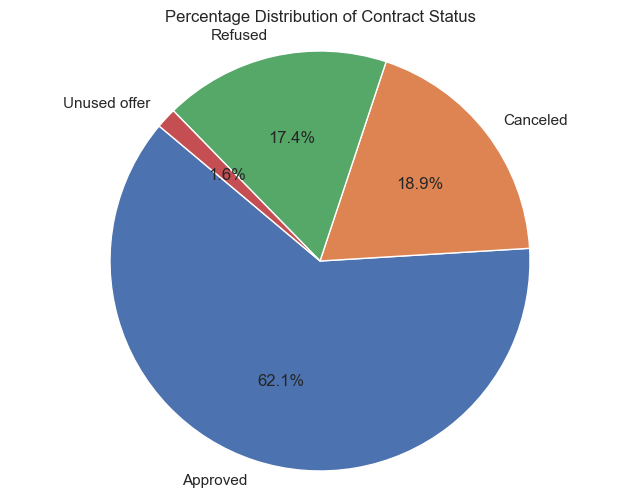

In [1209]:
# Calculate percentage of each contract status
contract_counts = previous_data['NAME_CONTRACT_STATUS'].value_counts()
contract_percent = (contract_counts / contract_counts.sum()) * 100

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(contract_percent, labels=contract_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Contract Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


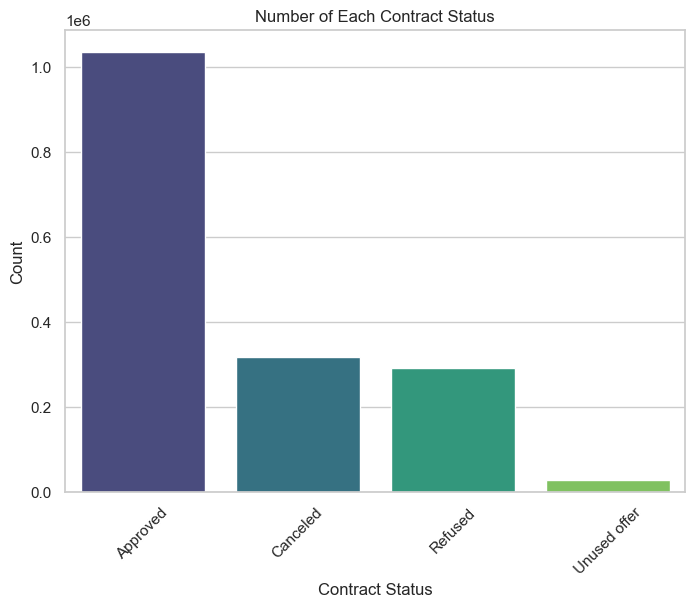

In [1210]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_counts.index, y=contract_counts.values, palette='viridis')
plt.title('Number of Each Contract Status')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Distribution Insights:

The pie chart shows the percentage breakdown of different contract statuses, such as Approved, Canceled, Refused, etc.
This helps identify which contract statuses are the most common and which are rare.
Frequency Comparison:

The bar plot gives a direct count comparison of the number of each contract status in the dataset.
Notice which status dominates, which might indicate successful contracts or rejected applications.

**Client Type**

In [1174]:
Client_Type = previous_data['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [1175]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/previous_data["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

,Percentage_of_Values,count
3,XNA,0.12
0,Repeater,73.72
2,Refreshed,8.12
1,New,18.04


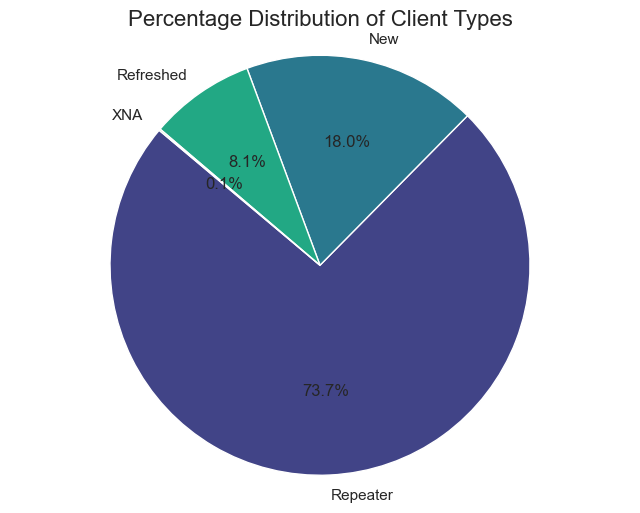

In [1212]:
# Calculate percentage of each client type
client_counts = previous_data['NAME_CLIENT_TYPE'].value_counts()
client_percent = (client_counts / client_counts.sum()) * 100

# Plot a pie chart with enhanced visuals
plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(client_counts))  # A nice color palette
plt.pie(client_percent, labels=client_percent.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage Distribution of Client Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


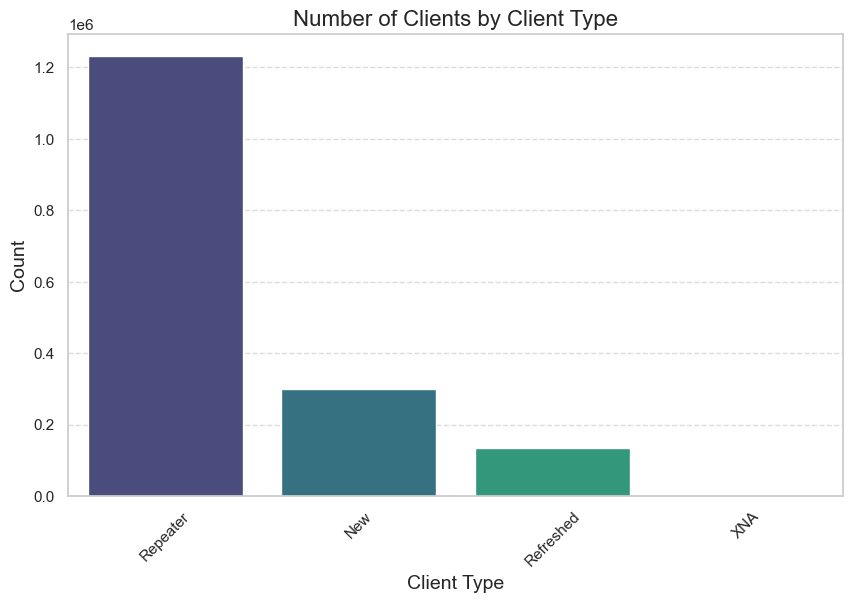

In [1213]:
# Plot a bar chart with better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

# Add titles and labels
plt.title('Number of Clients by Client Type', fontsize=16)
plt.xlabel('Client Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for readability
plt.show()


Dominant Client Type:

The "Repeater" category constitutes the largest share, making up 73.72% of clients. This indicates that most clients have ongoing or repeated interactions with your services.
New Clients:

The "New" client category represents 18.04%, suggesting a notable portion of fresh interactions.
Refreshed Clients:

"Refreshed" clients account for 8.12%, indicating clients returning after some time.

In [1199]:
Contract_Type = previous_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [1200]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/previous_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,Percentage_of_Values,count
3,XNA,0.02
2,Revolving loans,11.57
1,Consumer loans,43.66
0,Cash loans,44.76


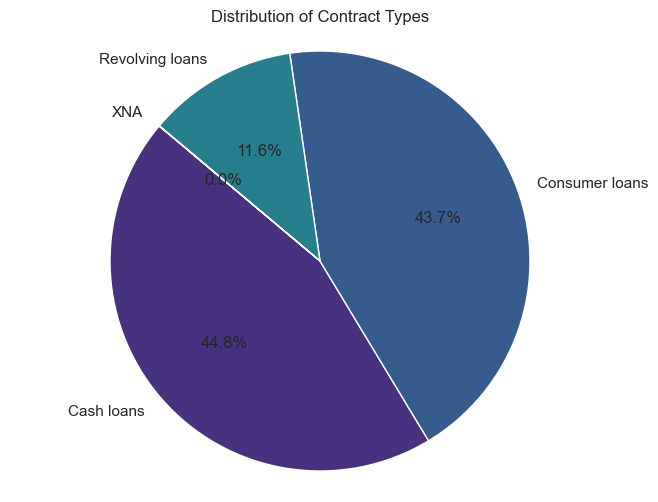

In [1214]:
contract_counts = previous_data['NAME_CONTRACT_TYPE'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Contract Types')
plt.axis('equal')
plt.show()

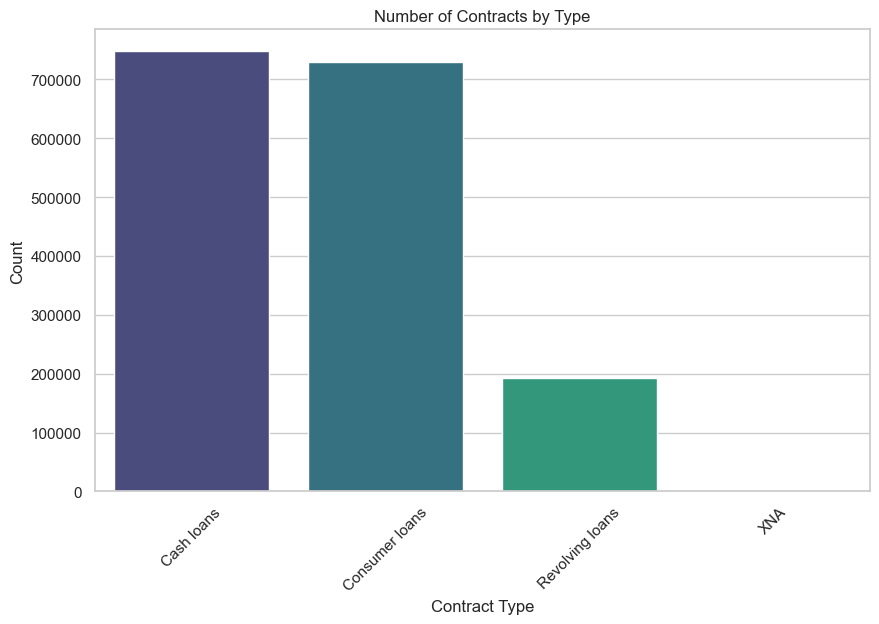

In [1215]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=contract_counts.index, y=contract_counts.values, palette='viridis')
plt.title('Number of Contracts by Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Cash Loans Dominate:

Cash loans are the most common contract type, making up 44.76% of the total contracts.
This highlights a strong client preference for direct access to cash, possibly for short-term needs or emergencies.
Consumer Loans:

Close to cash loans, consumer loans make up 43.66%, indicating their importance in the product portfolio.
These loans might cater to mid-to-long-term goals, such as purchasing durable goods or financing specific needs.
Revolving Loans:

At 11.57%, revolving loans are less frequent.
This suggests a smaller but potentially recurring customer base using credit lines for continuous spending.

XNA (Unknown Category):
A negligible 0.02% of contracts fall under "XNA," likely indicating data errors or unclassified contract types.

In [1216]:
Contract_Type = previous_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [1217]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/previous_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,Percentage_of_Values,count
3,XNA,0.02
2,Revolving loans,11.57
1,Consumer loans,43.66
0,Cash loans,44.76


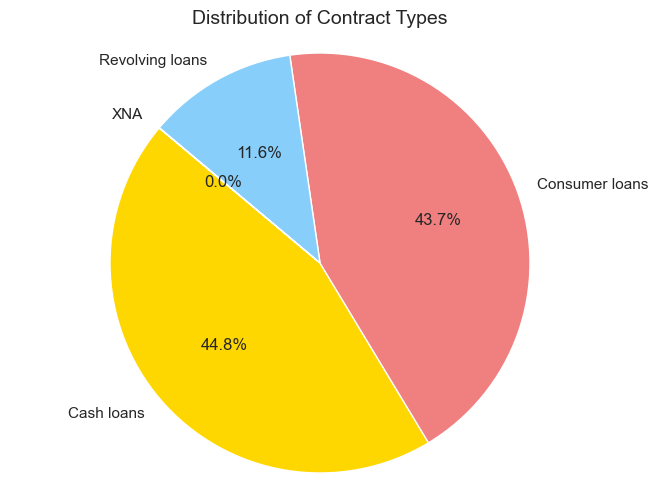

In [1218]:
contract_labels = ['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA']
contract_sizes = [44.76, 43.66, 11.57, 0.02]
contract_colors = ['gold', 'lightcoral', 'lightskyblue', 'grey']

plt.figure(figsize=(8, 6))
plt.pie(contract_sizes, labels=contract_labels, autopct='%1.1f%%', startangle=140, colors=contract_colors)
plt.title('Distribution of Contract Types', fontsize=14)
plt.axis('equal')
plt.show()

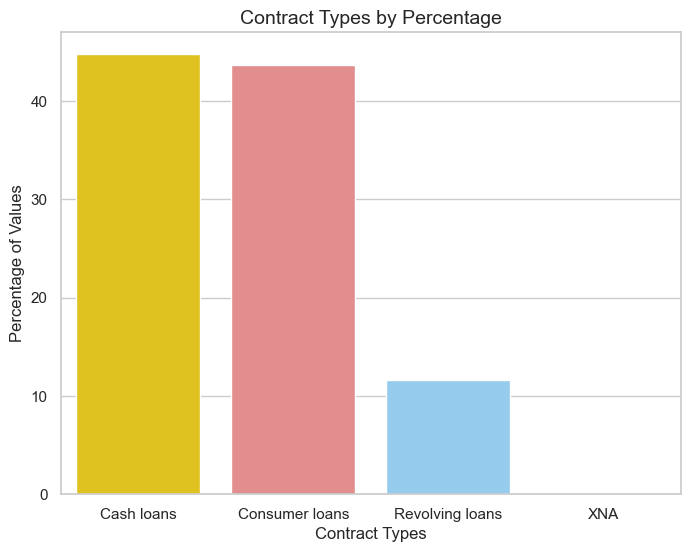

In [1219]:
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_labels, y=contract_sizes, palette=contract_colors)
plt.title('Contract Types by Percentage', fontsize=14)
plt.ylabel('Percentage of Values')
plt.xlabel('Contract Types')
plt.show()

Dominance of Cash and Consumer Loans:

Cash loans (44.76%) and Consumer loans (43.66%) collectively dominate the contract types, accounting for over 88% of the contracts.
These two loan types are the primary focus for financial institutions, reflecting the general client demand for these products.
Moderate Share of Revolving Loans:

Revolving loans contribute to 11.57% of the contracts, indicating a smaller yet significant segment of clients requiring flexible borrowing options.

**Days of approval - WEEKDAY_APPR_PROCESS_START**

In [1220]:
Approval_days = previous_data['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [1221]:
#find the percentage of contract status 
df_4=round((Approval_days.value_counts()/previous_data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
df_4 = pd.DataFrame(df_4)
df_4.reset_index(level=0, inplace=True)
df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_4

,Percentage_of_Values,count
1,WEDNESDAY,15.27
0,TUESDAY,15.27
4,THURSDAY,14.91
6,SUNDAY,9.86
5,SATURDAY,14.41
2,MONDAY,15.18
3,FRIDAY,15.09


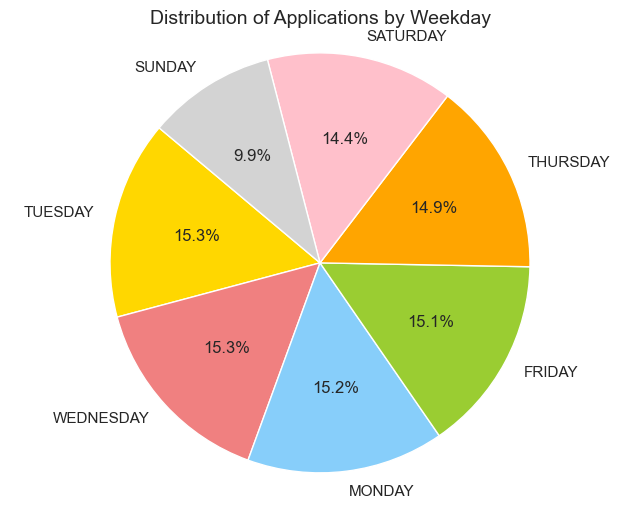

In [1222]:
# Data for plot
weekday_labels = ['TUESDAY', 'WEDNESDAY', 'MONDAY', 'FRIDAY', 'THURSDAY', 'SATURDAY', 'SUNDAY']
weekday_sizes = [15.27, 15.27, 15.18, 15.09, 14.91, 14.41, 9.86]
weekday_colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen', 'orange', 'pink', 'lightgrey']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(weekday_sizes, labels=weekday_labels, autopct='%1.1f%%', startangle=140, colors=weekday_colors)
plt.title('Distribution of Applications by Weekday', fontsize=14)
plt.axis('equal')
plt.show()

Peak Loan Applications on Weekdays:
Loan applications are concentrated during working days, with Tuesday, Wednesday, and Monday being the busiest days. This could indicate that clients prefer weekdays to manage financial tasks, including applying for or repaying loans.

Low Activity on Weekends:
The lowest loan-related activity occurs on Sunday (9.86%), suggesting that repayment or loan applications might be deferred to weekdays when clients have easier access to financial institutions.

**Payment type - NAME_PAYMENT_TYPE**

In [1224]:
Payment_Type = previous_data['NAME_PAYMENT_TYPE']
#find the percentage of Payment Type
df_6=round((Payment_Type.value_counts()/previous_data["NAME_PAYMENT_TYPE"].count())*100,2)
df_6 = pd.DataFrame(df_6)
df_6.reset_index(level=0, inplace=True)
df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_6

,Percentage_of_Values,count
1,XNA,37.56
2,Non-cash from your account,0.49
3,Cashless from the account of the employer,0.06
0,Cash through the bank,61.88


Most people preferred **CASH(62.44%)** as the mode of Payment

In [1227]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

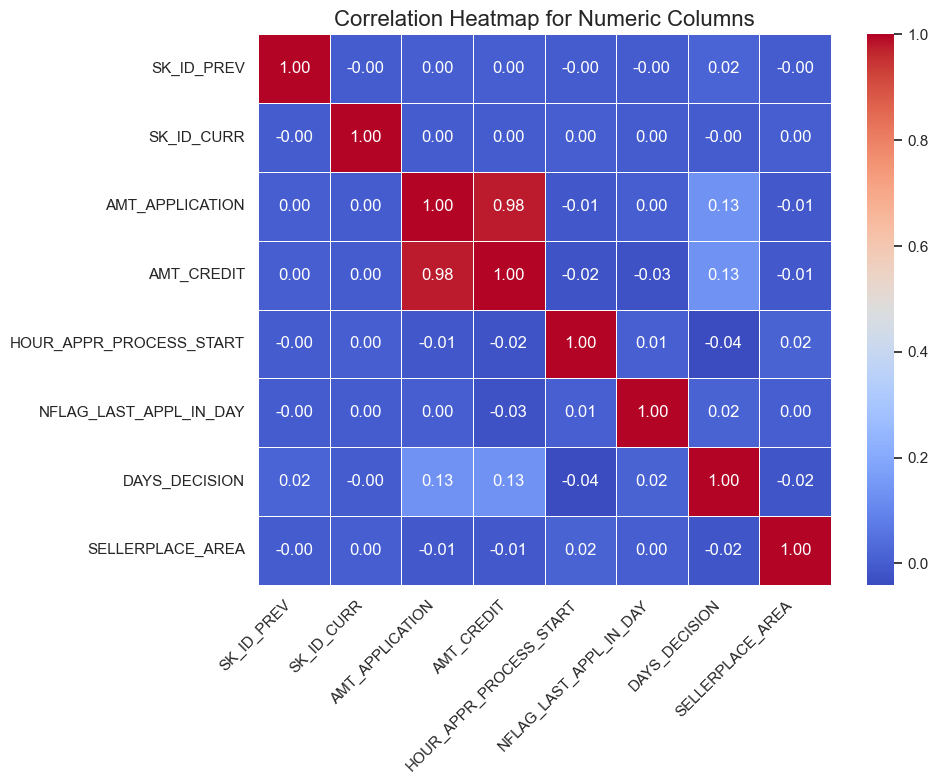

In [1230]:
# Selecting only numeric columns
numeric_columns = [
    'SK_ID_PREV', 'SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
    'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
    'SELLERPLACE_AREA'
]

# Calculate the correlation matrix for numeric columns
correlation_matrix = previous_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Key Insights into Loan Application Data

### 1. Strong Link Between AMT_APPLICATION and AMT_CREDIT  
- There is a **very high positive correlation (0.98)** between the **loan amount applied for** (`AMT_APPLICATION`) and the **approved credit amount** (`AMT_CREDIT`).  
- This means the loan approval process often closely matches the requested amount, indicating **efficient processing**.

---

### 2. DAYS_DECISION Has a Slight Positive Correlation  
- The variable **`DAYS_DECISION`** has a **slight positive correlation (0.13)** with both **AMT_APPLICATION** and **AMT_CREDIT**.  
- In simpler terms, **higher loan amounts may take a little longer to decide**.

---

### 3. Other Variables Have Little Impact  
- Most other features, such as:
    - **`HOUR_APPR_PROCESS_START`**  
    - **`NFLAG_LAST_APPL_IN_DAY`**  
    - **`SELLERPLACE_AREA`**  
- **Show little to no correlation** with loan amounts or decision timing.  
- This suggests these variables have **minimal influence** on loan outcomes.

---

### Summary  
- The **loan approval amount** is mainly driven by the **loan application amount**.  
- Other factors like **application start time and seller location** have **limited impact** on loan decisions.


# MERGED APPLICATION DF AND PREVIOUS DF

In [1231]:
prev_current_app_df = pd.merge(previous_data,application_df,how="inner",on="SK_ID_CURR")
prev_current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413646 entries, 0 to 1413645
Data columns (total 61 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_PREV                    1413646 non-null  int64  
 1   SK_ID_CURR                    1413646 non-null  int64  
 2   NAME_CONTRACT_TYPE            1413646 non-null  object 
 3   AMT_APPLICATION               1413646 non-null  float64
 4   AMT_CREDIT_x                  1413645 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START_x  1413646 non-null  object 
 6   HOUR_APPR_PROCESS_START       1413646 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT   1413646 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY        1413646 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE        1413646 non-null  object 
 10  NAME_CONTRACT_STATUS          1413646 non-null  object 
 11  DAYS_DECISION                 1413646 non-null  int64  
 12  NAME_PAYMENT_TYPE           

In [1232]:
prev_current_app_df.shape

(1413646, 61)

In [1233]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_APPLICATION                 0.0
AMT_CREDIT_x                    0.0
WEEKDAY_APPR_PROCESS_START_x    0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
TARGET                          0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                

## Insights into Loan Repayment Behavior

### Gender and Default Rates
- Female customers have a **lower default rate** compared to male customers, making them generally more reliable borrowers.

### Educational and Socioeconomic Factors
- Borrowers with **higher education**, **homeownership**, and **stable employment** are the safest and most reliable borrowers.
- **Less educated individuals** or those without stable employment are at a higher risk of default.

### Occupation and Risk
- **Low-risk occupations**: Commercial associates, pensioners, and state servants show a lower probability of default.
- **High-risk occupations**: Unemployed individuals and those on maternity leave have higher default risks due to financial instability.

### Family and Marital Status
- **Married customers** and those with families are more reliable in loan repayment.
- **Single** and **divorced customers** show slightly higher default rates.

### Income and Loan Amounts
- Customers with incomes between **1 to 2 million** are the most common borrowers.
- The **highest defaults** occur in the **0 to 1 million credit amount range**, indicating smaller loans have higher risk.

### Number of Children
- Clients with **fewer children** are generally safer borrowers due to lower financial burdens.
- Borrowers with **multiple dependents** are more likely to struggle with repayments.

### Loan Types and Preferences
- **Cash loans** are the most common type, likely reflecting immediate financial needs.
- Borrowers choosing **structured loan products** tend to exhibit better repayment behavior.

### Geographical and Regional Trends
- Borrowers from **high population density regions** tend to have slightly higher default rates, likely due to higher living costs.
- Customers from **rural areas** show stable repayment trends but generally borrow smaller amounts.

### Credit History and Stability
- Customers with a **longer credit history** and **consistent payment records** are more likely to repay on time.
- Borrowers with **prior defaults** or **late payments** are at significantly higher risk of defaulting again.
